In [ ]:
###################################################################################
#   PROJET TND : Prédire / diagnostiquer les troubles du langage chez l’enfant.   #
#   Classification binaire avec des données déséquilibrées.                       #
#---------------------------------------------------------------------------------#
#   NOTEBOOK D'EXPLORATION :                                                      #
#      ---> analyse univariée,                                                    #
#      ---> analyse multivariée,                                                  #
#      ---> preprocessing.                                                        #
###################################################################################

In [ ]:
#########################################################################
#   GITHUB                                                              #
#-----------------------------------------------------------------------#
# GitHub                : https://github.com/irribarre                  #
# Repository projet TND : https://github.com/irribarre/Classification_1 #
# Notebook 1            : github_1_data_exploration.ipynb               #
#########################################################################

In [ ]:
#############################################################################
# PLAN CODE :                                                               #
#############################################################################
# 1. DESCRIPTION DU DATASET CASE
#
# 2. DATA EXPLORATION
#    2.1. MESURES STATISTIQUES
#    2.2. VISUALISATION : OBJECTIF COMPOSITION
#         2.2.1. COUNT PLOT
#         2.2.2. BAR CHART
#    2.3. VISUALISATION : OBJECTIF DISTRIBUTION
#         2.3.1. HISTOGRAMME
#                2.3.1.1. ANALYSE UNIVARIEE : MESURES DE DISPERSION DES DONNEES
#                2.3.1.2. ANALYSE MULTIVARIEE
#         2.3.2. VIOLIN PLOT
#    2.4. VISUALISATION : OBJECTIF CORRELATION
#         2.4.1. SCATTER PLOT
#         2.4.2. CORRELOGRAMME
#
# 3. PREPROCESSING : TRANSFORMATION DONNEES BRUTES --> INTERNES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [2]:
###########################################################################
# DATASET :                                                               #
# https://www.kaggle.com/dgokeeffe/specific-language-impairment           #
###########################################################################

# Chargement jeu de données
# Nous utiliserons le fichier : all_data_R_high_cor_removed.csv et non all_data_R.csv, car certaines colonnes en doublons
# ont été supprimées ou fusionnées.
data = pd.read_csv("all_data_R_high_cor_removed.csv")

# 1. DESCRIPTION DU DATASET CASE

In [ ]:
#  Méthode CRISP : https://fr.blog.businessdecision.com/methode-crisp-la-cle-de-la-reussite-en-data-science/
#
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @  Ce paragraphe est la phase 2 (compréhension des données / découverte des données) de la méthode CRISP.   @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [3]:
# Affichage features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   filename               1163 non-null   object 
 1   sex                    1044 non-null   object 
 2   age                    1163 non-null   int64  
 3   corpus                 1163 non-null   object 
 4   group                  1163 non-null   object 
 5   child_TNW              1163 non-null   int64  
 6   child_TNS              1163 non-null   int64  
 7   examiner_TNW           1163 non-null   int64  
 8   freq_ttr               1163 non-null   float64
 9   r_2_i_verbs            1163 non-null   float64
 10  num_pos_tags           1163 non-null   int64  
 11  n_dos                  1163 non-null   int64  
 12  repetition             1163 non-null   int64  
 13  retracing              1163 non-null   int64  
 14  fillers                1163 non-null   int64  
 15  s_1g

In [4]:
# Nom des colonnes
list(data.columns)

['filename',
 'sex',
 'age',
 'corpus',
 'group',
 'child_TNW',
 'child_TNS',
 'examiner_TNW',
 'freq_ttr',
 'r_2_i_verbs',
 'num_pos_tags',
 'n_dos',
 'repetition',
 'retracing',
 'fillers',
 's_1g_ppl',
 's_2g_ppl',
 's_3g_ppl',
 'd_1g_ppl',
 'd_2g_ppl',
 'average_syl',
 'mlu_words',
 'mlu100_utts',
 'verb_utt',
 'dss',
 'ipsyn_total',
 'present_progressive',
 'propositions_in',
 'propositions_on',
 'plural_s',
 'irregular_past_tense',
 'possessive_s',
 'uncontractible_copula',
 'articles',
 'regular_past_ed',
 'regular_3rd_person_s',
 'irregular_3rd_person',
 'uncontractible_aux',
 'contractible_copula',
 'contractible_aux',
 'word_errors',
 'f_k',
 'n_v',
 'n_aux',
 'n_3s_v',
 'det_n_pl',
 'det_pl_n',
 'pro_aux',
 'pro_3s_v',
 'total_error']

In [5]:
#data.head()
data

filename     sex  age  corpus group  child_TNW  child_TNS  \
0      fssli009.cha     NaN  165  Conti4   SLI        287         36   
1      fssli058.cha     NaN  172  Conti4   SLI        368         42   
2      fssli062.cha     NaN  160  Conti4   SLI        266         26   
3      fssli066.cha     NaN  184  Conti4   SLI        405         40   
4      fssli108.cha     NaN  176  Conti4   SLI        300         35   
...             ...     ...  ...     ...   ...        ...        ...   
1158  9y54977ks.cha  female  109  Gillam    TD        349         41   
1159  9y54978ks.cha  female  126  Gillam    TD        666         56   
1160  9y54979ks.cha    male  119  Gillam    TD        337         29   
1161  9y54984ks.cha    male  112  Gillam    TD        511         45   
1162  9y54994ks.cha    male  108  Gillam    TD        495         57   

      examiner_TNW  freq_ttr  r_2_i_verbs  ...  word_errors       f_k  n_v  \
0                4     0.333     0.108108  ...            8  1.210456    0   
1               27     0.274     0.050000  ...           16  1.871708    0   
2                2     0.411     0.105263  ...            0  2.240602    0   
3               21     0.359     0.148936  ...            4  1.877762    1   
4               20     0.279     0.150000  ...            8  0.339524    0   
...            ...       ...          ...  ...          ...       ...  ...   
1158             1     0.395     0.355556  ...            0  2.437492    0   
1159             0     0.343     0.472973  ...            0  3.771638    2   
1160            18     0.409     0.315789  ...            0  3.123078    0   
1161             4     0.382     0.381818  ...            0  3.548256    1   
1162             5     0.396     0.309091  ...            0  1.789973    0   

      n_aux  n_3s_v  det_n_pl  det_pl_n  pro_aux  pro_3s_v  total_error  
0         2       2         7         0        0         1           12  
1         4       0         5         0        0         0            9  
2         1       0         5         0        0         0            6  
3         0       0        11         0        0         0           12  
4         1       1         5         0        0         0            7  
...     ...     ...       ...       ...      ...       ...          ...  
1158      0       0         4         0        0         1            5  
1159      2       0        14         0        0         9           27  
1160      0       0         5         0        0         4            9  
1161      0       0         9         0        0         5           15  
1162      1       0         7         0        0         4           12  

[1163 rows x 50 columns]

# 2. DATA EXPLORATION

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
# @ Ce paragraphe est la phase 2 (compréhension des données / exploration des données) de la méthode CRISP. @
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# 2.1. MESURES STATISTIQUES

In [6]:
# médiane (n'apparaît pas dans la fonction describe)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html
data.median(numeric_only = True) # numeric_only should be set to True to avoid getting an error
                                 # (ValueError: could not convert string to float: 'fssli009.cha')

age                       95.000000
child_TNW                384.000000
child_TNS                 45.000000
examiner_TNW               3.000000
freq_ttr                   0.371000
r_2_i_verbs                0.344828
num_pos_tags              39.000000
n_dos                      0.000000
repetition                 3.000000
retracing                  0.000000
fillers                    4.000000
s_1g_ppl                  24.950400
s_2g_ppl                   9.915250
s_3g_ppl                   8.205360
d_1g_ppl                  22.162800
d_2g_ppl                  13.650900
average_syl                1.177215
mlu_words                  7.561000
mlu100_utts               43.000000
verb_utt                   1.371000
dss                       10.420000
ipsyn_total               77.000000
present_progressive        7.000000
propositions_in            3.000000
propositions_on            2.000000
plural_s                   6.000000
irregular_past_tense      27.000000
possessive_s               0

In [7]:
# summary statistics (transpose met les attributs en ligne pour + de lisibilité)
data.describe(include = 'all').transpose()

count unique           top freq        mean  \
filename                 1163   1163  fssli009.cha    1         NaN   
sex                      1044      2          male  541         NaN   
age                    1163.0    NaN           NaN  NaN  101.139295   
corpus                   1163      3        Gillam  668         NaN   
group                    1163      2            TD  896         NaN   
child_TNW              1163.0    NaN           NaN  NaN  423.147034   
child_TNS              1163.0    NaN           NaN  NaN   50.412726   
examiner_TNW           1163.0    NaN           NaN  NaN   13.381771   
freq_ttr               1163.0    NaN           NaN  NaN    0.369982   
r_2_i_verbs            1163.0    NaN           NaN  NaN    0.464168   
num_pos_tags           1163.0    NaN           NaN  NaN   38.440241   
n_dos                  1163.0    NaN           NaN  NaN    0.882201   
repetition             1163.0    NaN           NaN  NaN    7.711092   
retracing              1163.0    NaN           NaN  NaN    5.244196   
fillers                1163.0    NaN           NaN  NaN    7.030095   
s_1g_ppl               1163.0    NaN           NaN  NaN  281.778169   
s_2g_ppl               1163.0    NaN           NaN  NaN  119.463296   
s_3g_ppl               1163.0    NaN           NaN  NaN   75.587054   
d_1g_ppl               1163.0    NaN           NaN  NaN   22.318822   
d_2g_ppl               1163.0    NaN           NaN  NaN   13.986955   
average_syl            1163.0    NaN           NaN  NaN    1.169627   
mlu_words              1163.0    NaN           NaN  NaN    7.560769   
mlu100_utts            1163.0    NaN           NaN  NaN   47.841788   
verb_utt               1163.0    NaN           NaN  NaN    1.375258   
dss                    1163.0    NaN           NaN  NaN   10.504746   
ipsyn_total            1163.0    NaN           NaN  NaN   74.865864   
present_progressive    1163.0    NaN           NaN  NaN    9.787618   
propositions_in        1163.0    NaN           NaN  NaN    3.184867   
propositions_on        1163.0    NaN           NaN  NaN    2.569218   
plural_s               1163.0    NaN           NaN  NaN    6.601892   
irregular_past_tense   1163.0    NaN           NaN  NaN   30.299226   
possessive_s           1163.0    NaN           NaN  NaN    0.705933   
uncontractible_copula  1163.0    NaN           NaN  NaN    8.291488   
articles               1163.0    NaN           NaN  NaN    23.66638   
regular_past_ed        1163.0    NaN           NaN  NaN   10.874463   
regular_3rd_person_s   1163.0    NaN           NaN  NaN    3.959587   
irregular_3rd_person   1163.0    NaN           NaN  NaN     5.39037   
uncontractible_aux     1163.0    NaN           NaN  NaN    8.482373   
contractible_copula    1163.0    NaN           NaN  NaN    0.705073   
contractible_aux       1163.0    NaN           NaN  NaN    0.752365   
word_errors            1163.0    NaN           NaN  NaN    0.561479   
f_k                    1163.0    NaN           NaN  NaN    1.490996   
n_v                    1163.0    NaN           NaN  NaN    1.323302   
n_aux                  1163.0    NaN           NaN  NaN    1.542562   
n_3s_v                 1163.0    NaN           NaN  NaN    1.093723   
det_n_pl               1163.0    NaN           NaN  NaN    6.846088   
det_pl_n               1163.0    NaN           NaN  NaN    0.009458   
pro_aux                1163.0    NaN           NaN  NaN    0.041273   
pro_3s_v               1163.0    NaN           NaN  NaN    2.784179   
total_error            1163.0    NaN           NaN  NaN   13.640585   

                               std       min       25%       50%       75%  \
filename                       NaN       NaN       NaN       NaN       NaN   
sex                            NaN       NaN       NaN       NaN       NaN   
age                      31.963881      48.0      79.0      95.0     115.0   
corpus                         NaN       NaN       NaN       NaN       NaN   
group       

# 2.2. VISUALISATION : OBJECTIF COMPOSITION

# 2.2.1. COUNT PLOT

In [8]:
print("0 -> TD (sans trouble), 1 -> SLI (trouble)\n")
print(data.group.value_counts())

0 -> TD (sans trouble), 1 -> SLI (trouble)

group
TD     896
SLI    267
Name: count, dtype: int64


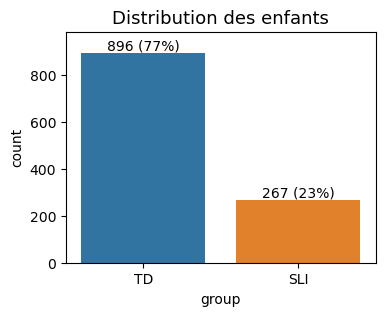

In [9]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
# https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
plt.subplots(figsize = (4, 3))
# sns.countplot(data, x = 'group')
ax = sns.countplot(x = data['group'],
                   order = data['group'].value_counts(ascending = False).index)
        
abs_values = data['group'].value_counts(ascending = False)
rel_values = data['group'].value_counts(ascending = False, normalize = True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

plt.title('Distribution des enfants', fontsize = 13)

ax.bar_label(container = ax.containers[0], labels = lbls)
# https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
ax.margins(y = 0.1)  # Padding for clarity

# ==> les données sont déséquilibrées (car 'group' sera la valeur y dans les algorithmes)
#
# Les enfants sont répartis en 2 groupes :
# -->  TD (Typically Developing) : enfant en développement normal.
# --> SLI (Specific Language Impairment) : enfant avec trouble de langage.

<AxesSubplot:xlabel='group', ylabel='count'>

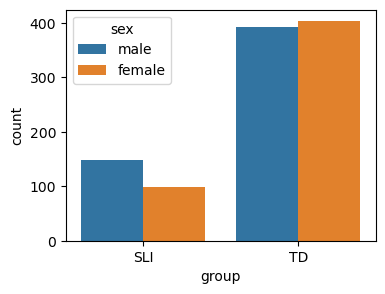

In [10]:
# 2ième variable : sex
plt.subplots(figsize = (4, 3))
sns.countplot(data, x = 'group', hue = 'sex')

# 2.2.2. BAR CHART

In [11]:
# Maj légende en haut des rectangles
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if ( height != 0 ):
            ax.text(rect.get_x() + rect.get_width()/2, height,
                    '%d' % int(height),
                    ha = 'center', va = 'bottom',  fontsize = 9)

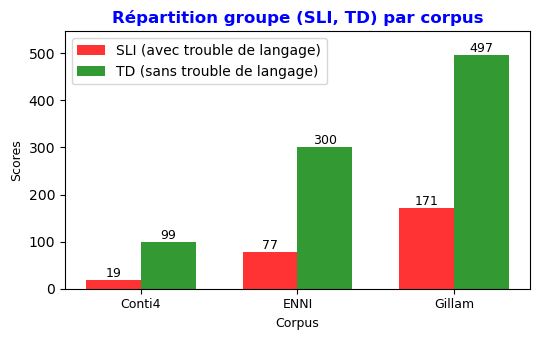

In [12]:
#-----------------------------------------#
#        Bar chart : groupe, corpus       #
#-----------------------------------------#

# data to plot
n_groups = 3

# Masques groupe SLI
mask_sli_Conti4 = data[(data.group == 'SLI') & (data.corpus == 'Conti4')]
mask_sli_ENNI   = data[(data.group == 'SLI') & (data.corpus == 'ENNI')]
mask_sli_Gillam = data[(data.group == 'SLI') & (data.corpus == 'Gillam')]

# Masques groupe TD
mask_td_Conti4 = data[(data.group == 'TD') & (data.corpus == 'Conti4')]
mask_td_ENNI   = data[(data.group == 'TD') & (data.corpus == 'ENNI')]
mask_td_Gillam = data[(data.group == 'TD') & (data.corpus == 'Gillam')]

# Means_xxx stocke les masques du groupe xxx pour chaque groupe corpus (Conti4, ENNI, Gillam)
# |   Conti4   ||     ENNI   ||    Gillam  ||
# | SLI  | TD  || SLI  | TD  || SLI  | TD  ||
means_sli = [len(mask_sli_Conti4), len(mask_sli_ENNI), len(mask_sli_Gillam)]
means_td  = [len(mask_td_Conti4),  len(mask_td_ENNI),  len(mask_td_Gillam)]

# valeur maximale dans les listes means_xxx
means_max = max(means_sli + means_td)
# ajout de 10% à la valeur max
y_limit = means_max + 10/100 * means_max

        
# create plot
fig, ax = plt.subplots(figsize = (5.5, 3.5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index,             means_sli, bar_width, alpha = opacity, color = 'r', 
                 label = 'SLI (avec trouble de langage)')
rects2 = plt.bar(index + bar_width, means_td,  bar_width, alpha = opacity, color = 'g', 
                 label = 'TD (sans trouble de langage)')
 
plt.xlabel('Corpus', fontsize = 9)
plt.ylabel('Scores', fontsize = 9)
plt.title('Répartition groupe (SLI, TD) par corpus', fontsize = 12, color = 'blue', fontweight = 'bold')
plt.xticks(index + bar_width / 2, ('Conti4', 'ENNI', 'Gillam'), fontsize = 9)
plt.ylim(0, y_limit) # petit espace en haut du plot pour compenser l'annotation
plt.legend()

# Ajout scores en légende
autolabel(rects1)
autolabel(rects2)

    
plt.tight_layout()
plt.show()

In [ ]:
# Cette étude a évalué trois datasets obtenus via le projet CHILDES (CHIld Language Data Exchange System).
# Tous les datasets consistent en des récits d'un enfant essayant de terminer une tâche d'image sans mots. 
# Le choix de n'utiliser que des corpus narratifs était basé sur des recherches antérieures qui indiquaient qu'il était 
# le plus apte à distinguer une déficience du langage chez les enfants. 
#
# --> Le premier dataset (Conti-Ramsden 4) comprend des échantillons d’adolescents britanniques.
# --> Le second (ENNI) d’enfants canadiens.
# --> Le troisième (Gillam) d’enfants américains.
# Notre jeu de données comprend 1163 échantillons, car trouver des données de transcription de ce type est rare.

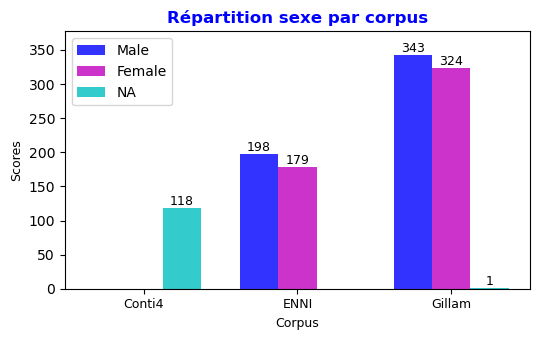

In [13]:
#-----------------------------------------#
#         Bar chart : sexe, corpus        #
#-----------------------------------------#

# data to plot
n_groups = 3

# Masques sexe male
mask_male_Conti4 = data[(data.sex == 'male') & (data.corpus == 'Conti4')]
mask_male_ENNI   = data[(data.sex == 'male') & (data.corpus == 'ENNI')]
mask_male_Gillam = data[(data.sex == 'male') & (data.corpus == 'Gillam')]

# Masques sexe female
mask_female_Conti4 = data[(data.sex == 'female') & (data.corpus == 'Conti4')]
mask_female_ENNI   = data[(data.sex == 'female') & (data.corpus == 'ENNI')]
mask_female_Gillam = data[(data.sex == 'female') & (data.corpus == 'Gillam')]

# Masques sexe NaN
# Le paramètre sexe n'est pas renseigné pour Conti4
mask_NaN_Conti4 = data[(data.sex.isna()) & (data.corpus == 'Conti4')]
mask_NaN_ENNI   = data[(data.sex.isna()) & (data.corpus == 'ENNI')]
mask_NaN_Gillam = data[(data.sex.isna()) & (data.corpus == 'Gillam')]


# Means_xxx stocke les masques du sexe xxx pour chaque groupe corpus (Conti4, ENNI, Gillam)
# |        Conti4       ||         ENNI         ||       Gillam        ||
# | Male | Female | NaN || Male | Female | NaN || Male | Female | NaN ||
means_male   = [len(mask_male_Conti4),   len(mask_male_ENNI),   len(mask_male_Gillam)]
means_female = [len(mask_female_Conti4), len(mask_female_ENNI), len(mask_female_Gillam)]
means_NaN    = [len(mask_NaN_Conti4),    len(mask_NaN_ENNI),    len(mask_NaN_Gillam)]

# valeur maximale dans les listes means_xxx
means_max = max(means_male + means_female + means_NaN)
# ajout de 10% à la valeur max
y_limit = means_max + 10/100 * means_max

        
# create plot
fig, ax = plt.subplots(figsize = (5.5, 3.5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index,               means_male,   bar_width, alpha = opacity, color = 'b', label = 'Male')
rects2 = plt.bar(index + bar_width,   means_female, bar_width, alpha = opacity, color = 'm', label = 'Female')
rects3 = plt.bar(index + 2*bar_width, means_NaN,    bar_width, alpha = opacity, color = 'c', label = 'NA')


plt.xlabel('Corpus', fontsize = 9)
plt.ylabel('Scores', fontsize = 9)
plt.title('Répartition sexe par corpus', fontsize = 12, color = 'blue', fontweight = 'bold')
plt.xticks(index + 0.25 , ('Conti4', 'ENNI', 'Gillam'), fontsize = 9)
plt.ylim(0, y_limit) # petit espace en haut du plot pour compenser l'annotation
plt.legend()

# Ajout scores en légende
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

    
plt.tight_layout()
plt.show()

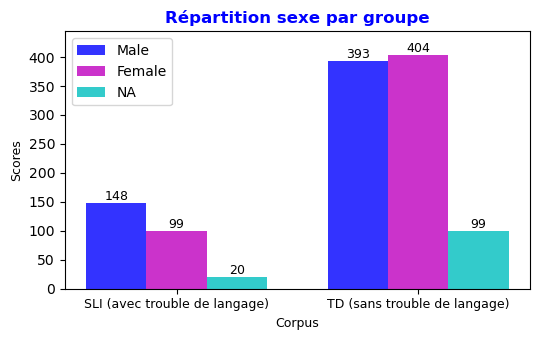

In [14]:
#-----------------------------------------#
#        Bar chart : sexe, groupe         #
#-----------------------------------------#

# data to plot
n_groups = 2

# Masques sexe male
mask_male_sli = data[(data.sex == 'male') & (data.group == 'SLI')]
mask_male_td  = data[(data.sex == 'male') & (data.group == 'TD')]

# Masques sexe female
mask_female_sli = data[(data.sex == 'female') & (data.group == 'SLI')]
mask_female_td  = data[(data.sex == 'female') & (data.group == 'TD')]

# Masques sexe NaN
# Le paramètre sexe n'est pas renseigné pour Conti4
mask_NaN_sli = data[(data.sex.isna()) & (data.group == 'SLI')]
mask_NaN_td  = data[(data.sex.isna()) & (data.group == 'TD')]



# Means_xxx stocke les masques du sexe xxx pour chaque groupe (SLI, TD)
# |          SLI        ||          TD         ||  
# | Male | Female | NaN || Male | Female | NaN || 
means_male   = [len(mask_male_sli),   len(mask_male_td)]
means_female = [len(mask_female_sli), len(mask_female_td)]
means_NaN    = [len(mask_NaN_sli),    len(mask_NaN_td)]

# valeur maximale dans les listes means_xxx
means_max = max(means_male + means_female + means_NaN)
# ajout de 10% à la valeur max
y_limit = means_max + 10/100 * means_max

        
# create plot
fig, ax = plt.subplots(figsize = (5.5, 3.5))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index,               means_male,   bar_width, alpha = opacity, color = 'b', label = 'Male')
rects2 = plt.bar(index + bar_width,   means_female, bar_width, alpha = opacity, color = 'm', label = 'Female')
rects3 = plt.bar(index + 2*bar_width, means_NaN,    bar_width, alpha = opacity, color = 'c', label = 'NA')


plt.xlabel('Corpus', fontsize = 9)
plt.ylabel('Scores', fontsize = 9)
plt.title('Répartition sexe par groupe', fontsize = 12, color = 'blue', fontweight = 'bold')
plt.xticks(index + 0.25 , ('SLI (avec trouble de langage)', 'TD (sans trouble de langage)'), fontsize = 9)
plt.ylim(0, y_limit) # petit espace en haut du plot pour compenser l'annotation
plt.legend()

# Ajout scores en légende
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

    
plt.tight_layout()
plt.show()

# 2.3. VISUALISATION : OBJECTIF DISTRIBUTION

# 2.3.1. HISTOGRAMME

# 2.3.1.1. ANALYSE UNIVARIEE : MESURES DE DISPERSION DES DONNEES

In [15]:
#-----------------------------------------#
#           Histogramme 2 séries          #
#-----------------------------------------#
def Histogramme_2_Series(field_p):
    
    mask_td  = data[data.group == 'TD'][field_p]
    mask_sli = data[data.group == 'SLI'][field_p] 
    plt.subplots(figsize = (5.5, 3))
    
    plt.hist([mask_td, mask_sli],
             color = ['green', 'red'],
             edgecolor = 'yellow', 
             hatch = '.', 
             label = ['TD', 'SLI'],
             histtype = 'barstacked')

    plt.ylabel('Nombre enfants')
    plt.xlabel(field_p + '\n') # espace entre les figures
    plt.title('Répartition par groupe (empilée) : ' + field_p, fontsize = 12, color = 'blue', fontweight = 'bold')
    plt.legend()
    plt.show()

In [16]:
#-----------------------------------------#
#             Histogramme simple          #
#-----------------------------------------#
def Histogramme_Simple(field_p, group_p):
        
    # Masques suivant le(s) groupe(s)
    # >>> champ SLI uniquement
    if (group_p == 'SLI'):
        mask  = data[data.group == 'SLI'][field_p]
        label = 'SLI'
        color = 'red'
    # >>> champ TD uniquement
    elif (group_p == 'TD'):
        mask  = data[data.group == 'TD'][field_p]
        label = 'TD'
        color = 'green'
    
    plt.subplots(figsize = (5.5, 3))
    
    plt.hist(mask,
             color = color,
             edgecolor = 'yellow', 
             hatch = '.', 
             label = label)

    plt.ylabel('Nombre enfants')
    plt.xlabel(field_p + '\n') # espace entre les figures
    plt.title('Répartition d\'un seul groupe : ' + field_p, fontsize = 12, color = 'blue', fontweight = 'bold')
    plt.legend()
    plt.show()

In [ ]:
# Appel fonction Histogramme pour tous les champs numériques i.e. sauf pour filename, sex, corpus, group

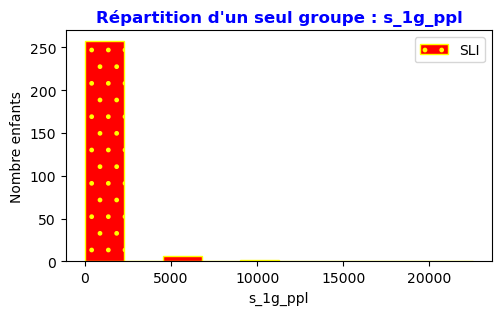

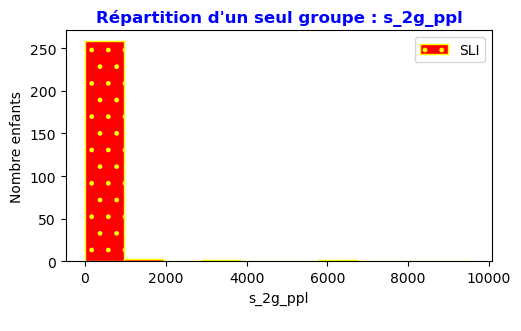

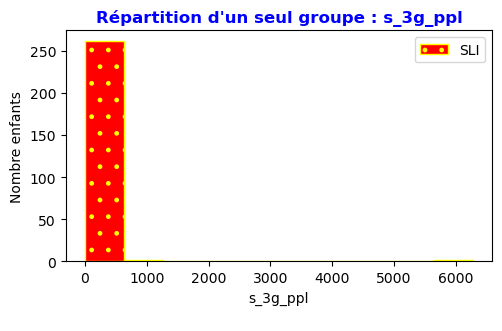

In [17]:
# Histogramme simple
# >>>>>>> SLI
col_sli = ['s_1g_ppl', 's_2g_ppl', 's_3g_ppl']

for col in col_sli:
    Histogramme_Simple(col, 'SLI')

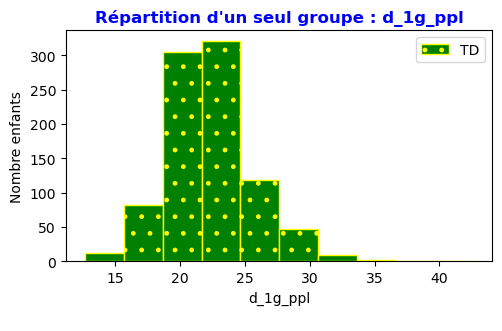

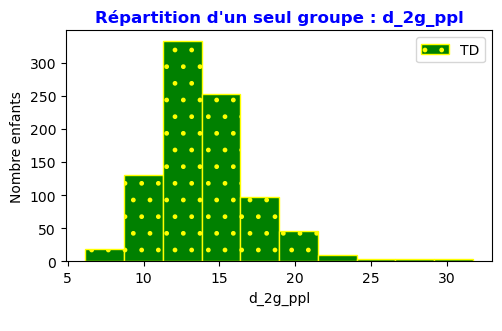

In [18]:
# Histogramme simple 
# >>>>>>> TD
col_td = ['d_1g_ppl', 'd_2g_ppl']

for col in col_td:
    Histogramme_Simple(col, 'TD')

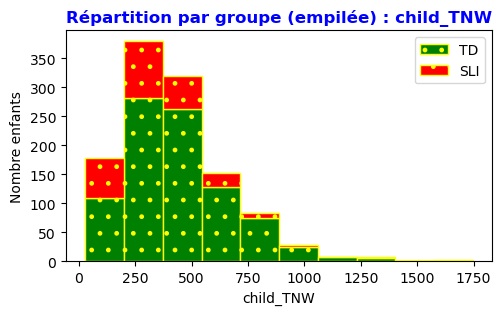

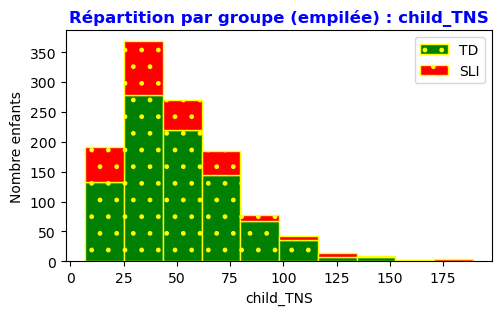

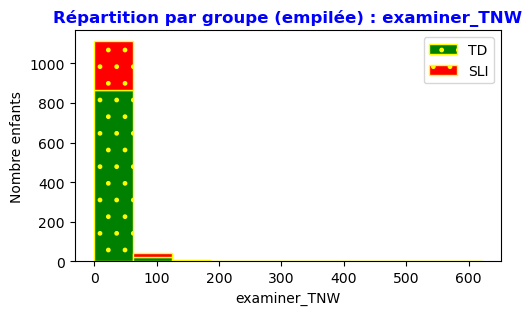

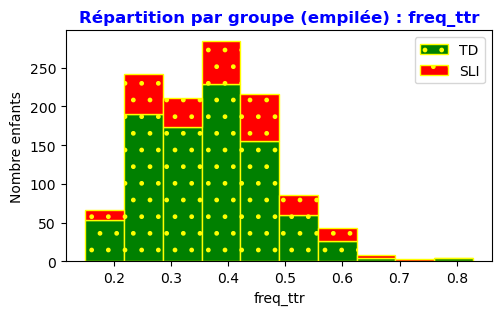

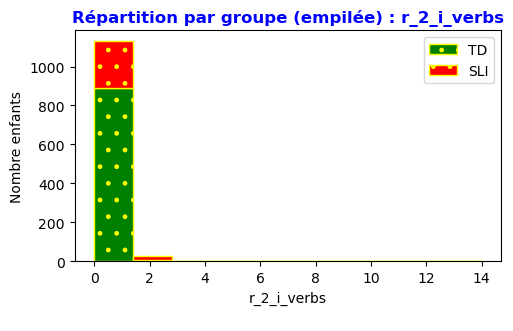

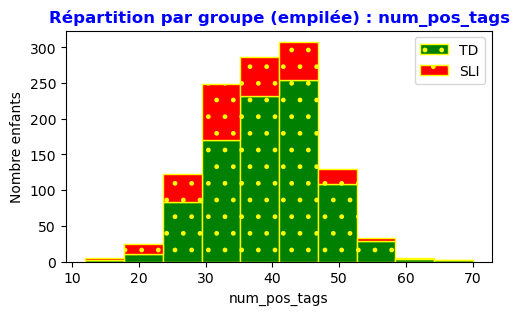

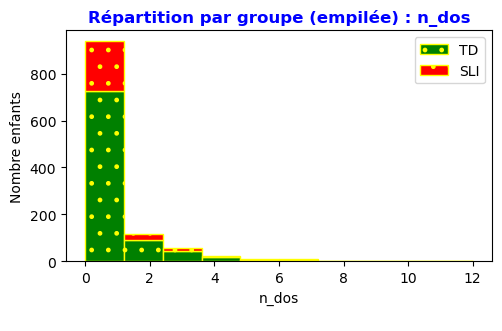

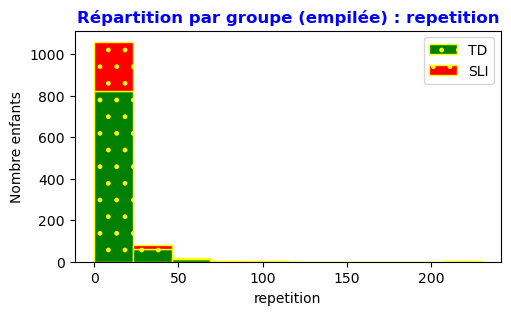

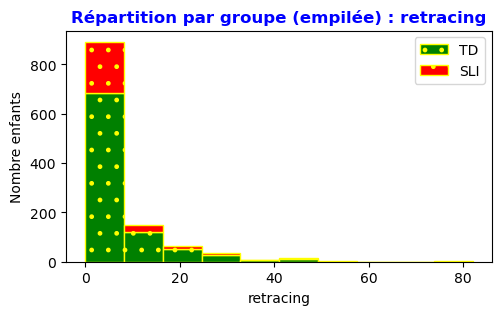

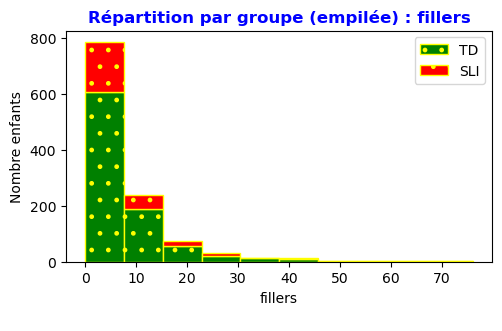

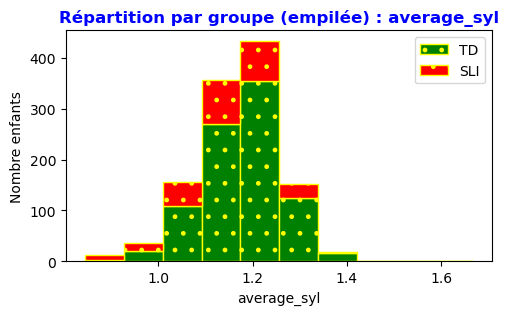

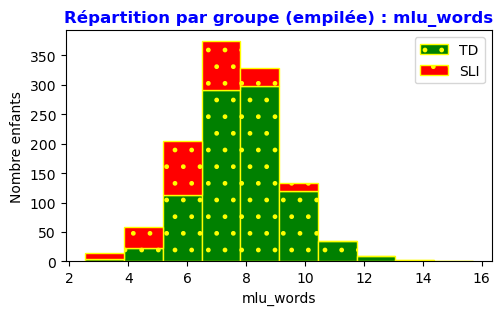

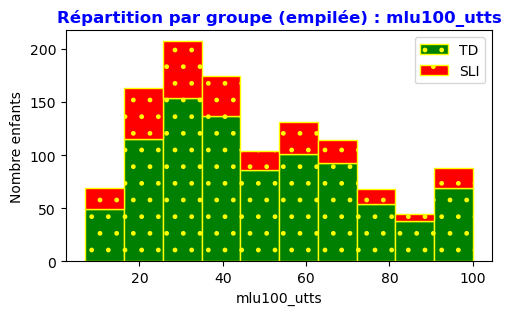

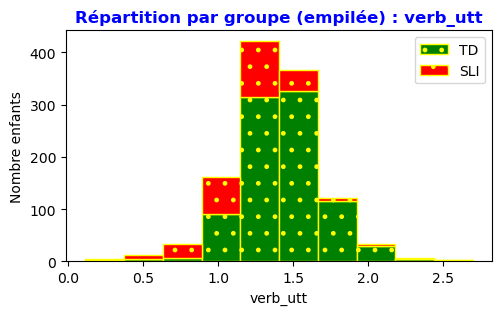

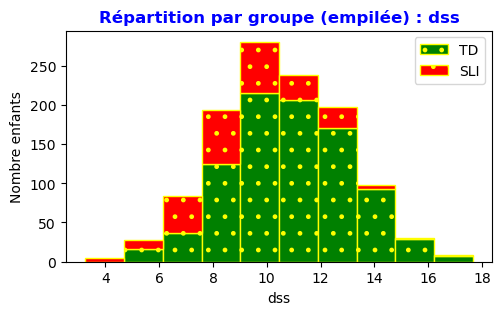

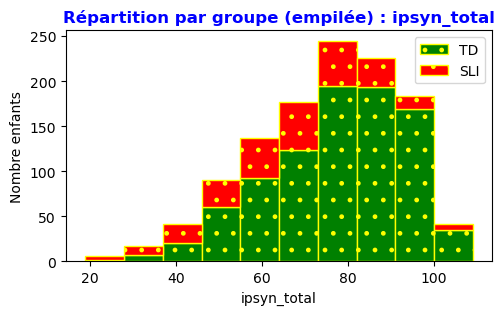

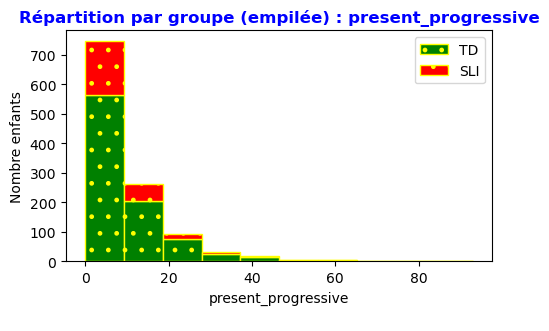

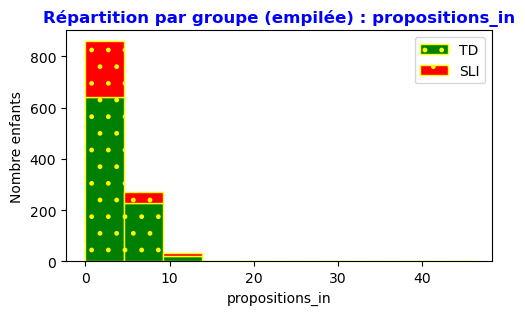

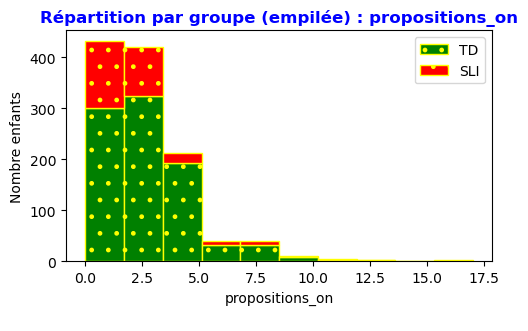

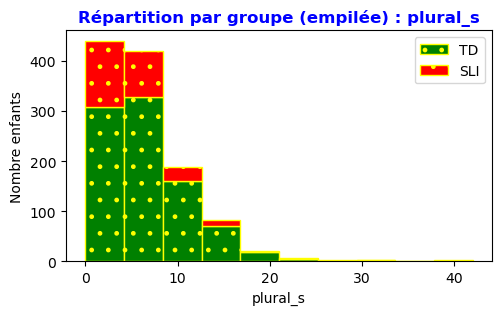

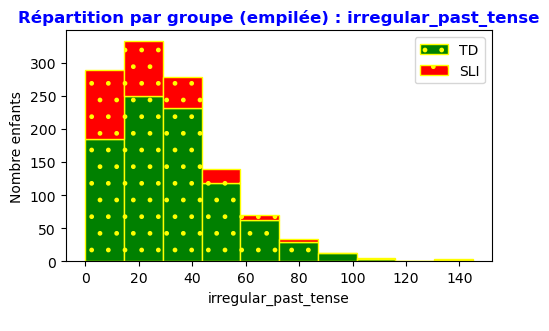

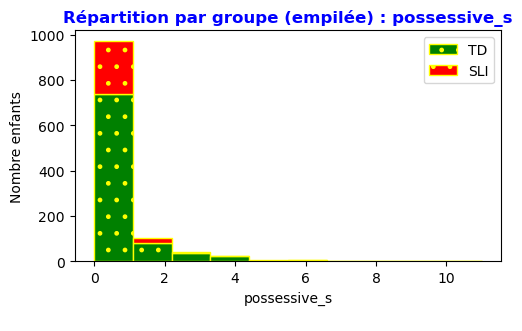

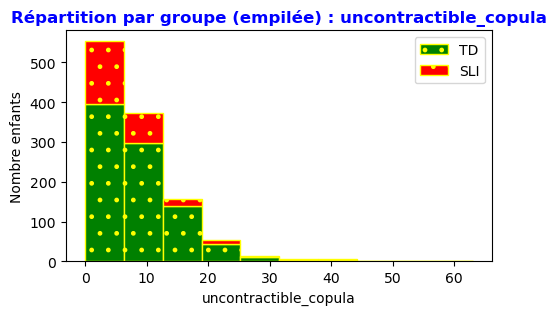

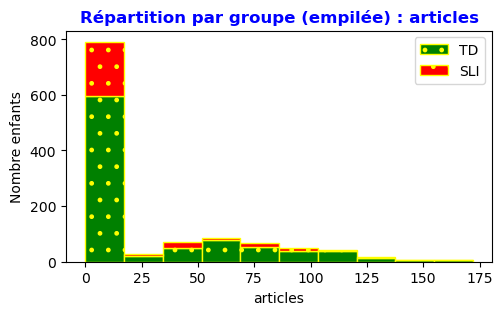

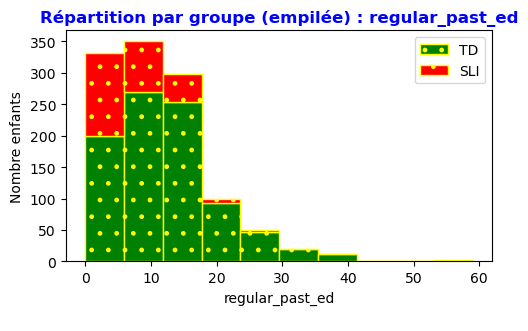

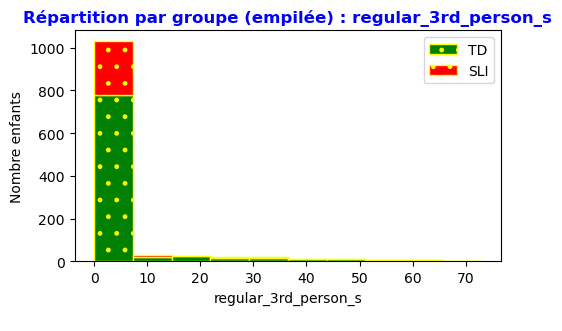

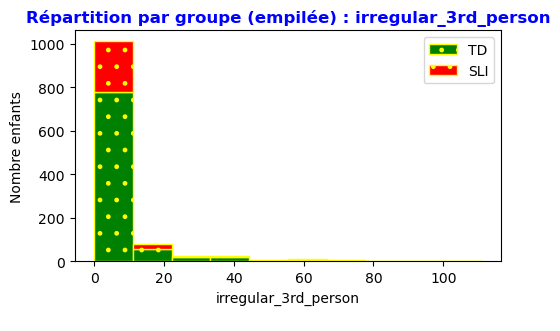

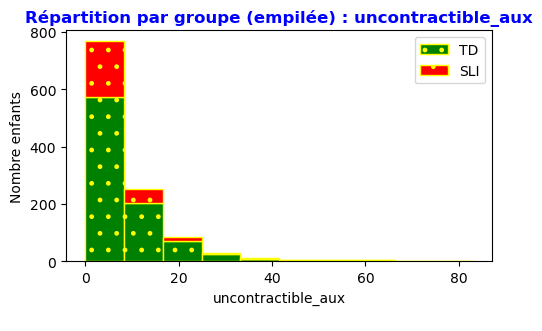

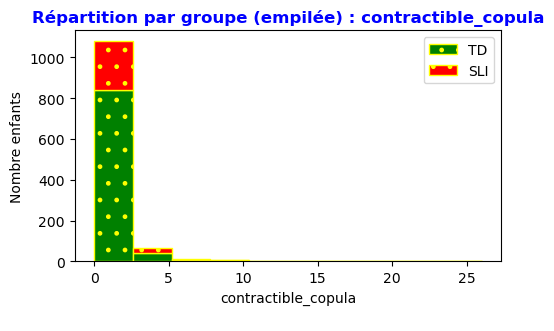

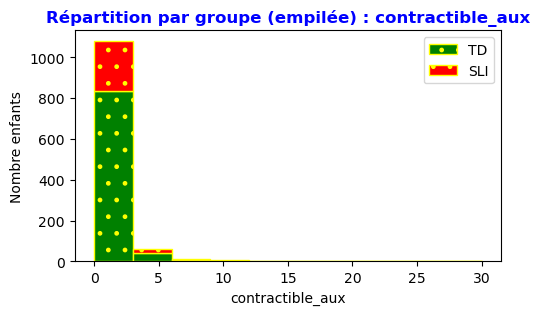

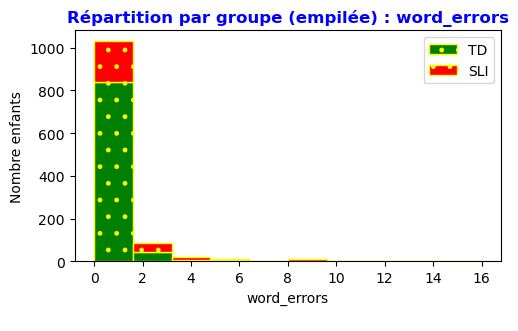

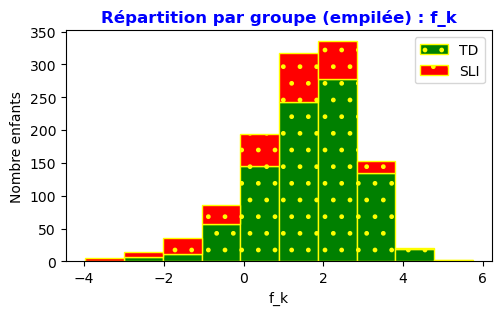

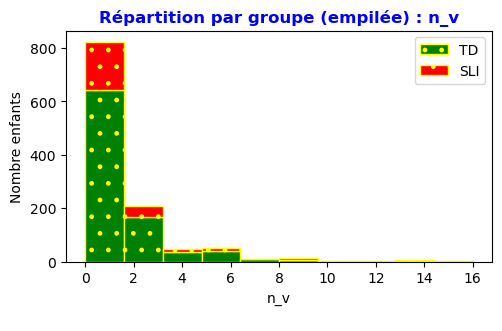

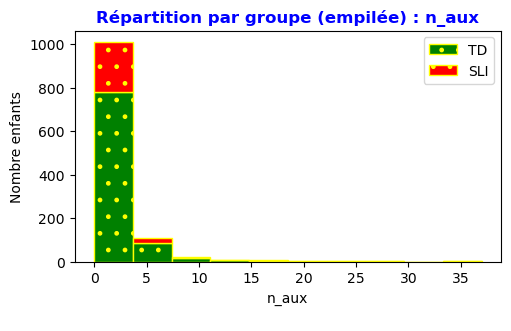

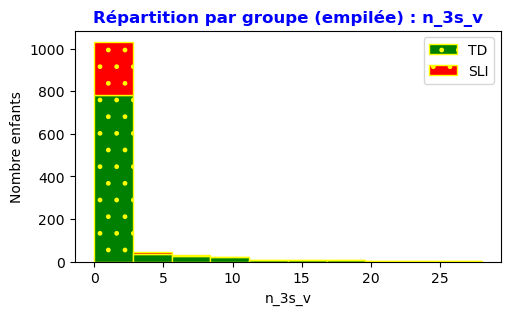

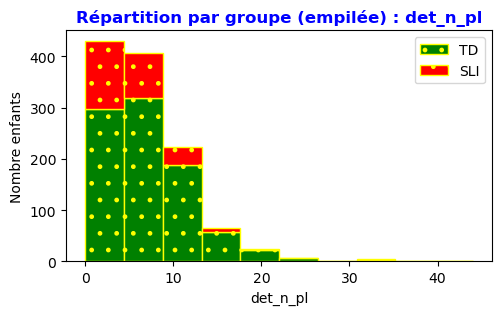

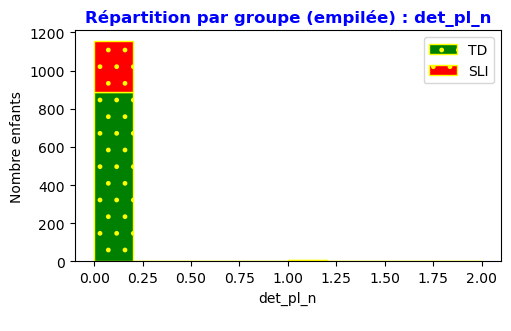

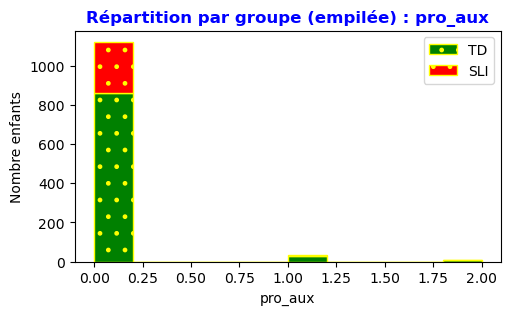

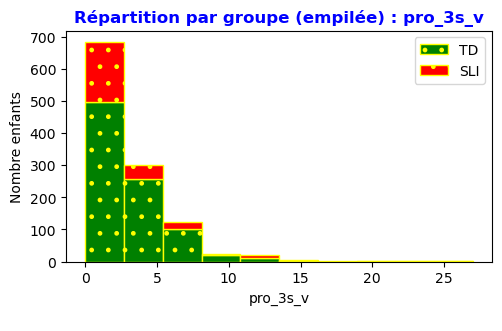

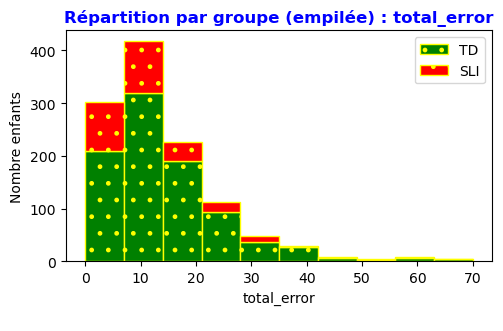

In [19]:
# Histogramme 2 séries
for col in data.columns:
    if ((is_numeric_dtype(data[col])) & (col != 'age') & (col != 'age_int') &
        (col not in col_sli) & (col not in col_td)):
        
        Histogramme_2_Series(col)

# 2.3.1.2. ANALYSE MULTIVARIEE

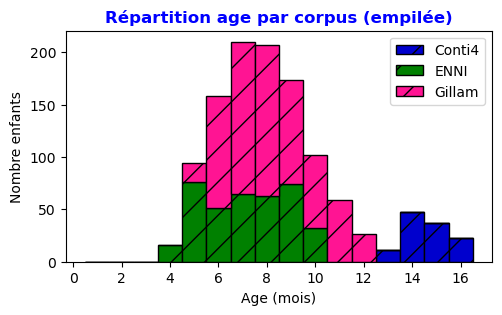

In [20]:
#-----------------------------------------#
#         Histogramme : age, corpus       #
#-----------------------------------------#
plt.subplots(figsize = (5.5, 3))

# Masques groupes
mask_Conti4 = data[data.corpus == 'Conti4']['age']/12
mask_ENNI   = data[data.corpus == 'ENNI']['age']/12
mask_Gillam = data[data.corpus == 'Gillam']['age']/12

bins = [x + 0.5 for x in range(0, 17)]
plt.hist([mask_Conti4, mask_ENNI, mask_Gillam],
            bins = bins, 
            color = ['mediumblue', 'green', 'deeppink'],
            edgecolor = 'black', 
            hatch = '/', 
            label = ['Conti4', 'ENNI', 'Gillam'],
            histtype = 'barstacked')
plt.ylabel('Nombre enfants')
plt.xlabel('Age (mois)')
plt.title('Répartition age par corpus (empilée)', fontsize = 12, color = 'blue', fontweight = 'bold')
plt.legend()

In [ ]:
# Le premier dataset (Conti-Ramsden 4) comprend des échantillons d’adolescents britanniques.
# Le second (ENNI) d’enfants canadiens âgés de 4 à 9 ans.
# Le troisième (Gillam) d’enfants américains de 4 à 12 ans.

# 2.3.2. VIOLIN PLOT

In [21]:
data_interne = data

# Données internes : age converti en mois puis entier (condition pour paramètre in violin)
data_interne['age_int'] = (data['age']/12).astype('int')

In [22]:
#-----------------------------------------#
#       Violin Plot : champ, age          #
#-----------------------------------------#
def Violin_plot_age(field_p):
    
    sns.catplot(x          = 'age_int', 
                y          = field_p,
                hue        = 'group',
                data       = data_interne, 
                kind       = 'violin', 
                palette    = ['red', 'green'], 
                height     = 4, 
                split      = True,
                legend_out = True)
    
    plt.title('Violin plot ' + field_p + ' par age (ans)', fontsize = 12, color = 'blue', fontweight = 'bold')
    plt.show()
    
    print('\n') # espace entre les figures

In [23]:
#-----------------------------------------#
#       Violin Plot : champ, group        #
#-----------------------------------------#
def Violin_plot_group(field_p):
    
    g = sns.catplot(x          = 'group', 
                    y          = field_p, 
                    data       = data_interne, 
                    kind       = 'violin', 
                    palette    = ['red', 'green'], 
                    height     = 4, 
                    split      = True,
                    legend_out = True)
    
#   sns.swarmplot : erreurs (trop grand nombre de points)
    sns.stripplot(x       = 'group', 
                  y       = field_p, 
                  hue     = 'sex',
                  data    = data_interne, 
                  palette = ['dodgerblue', 'deeppink'], 
                  size    = 2,  
                  ax      = g.ax,
                  dodge   = True)
    
    plt.title('Violin plot ' + field_p + ' par groupe', fontsize = 12, color = 'blue', fontweight = 'bold')
    plt.show()
    
    print('\n') # espace entre les figures

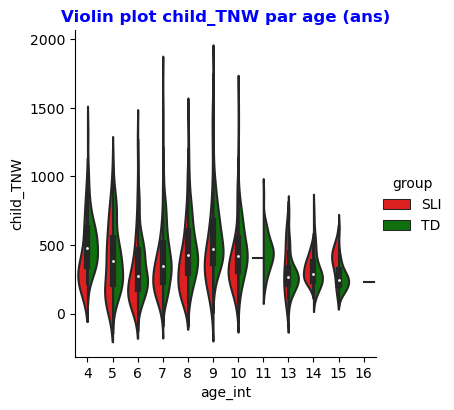

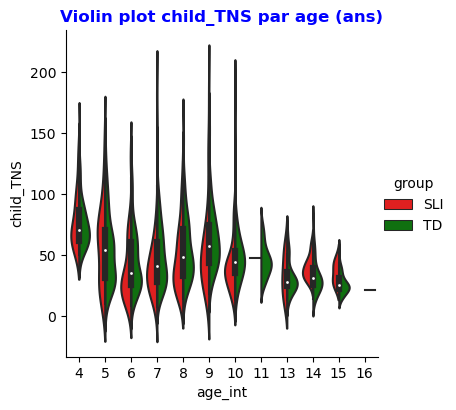

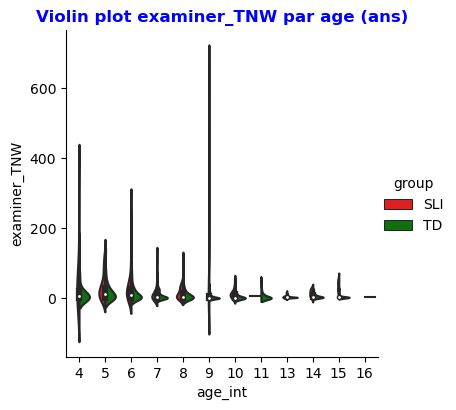

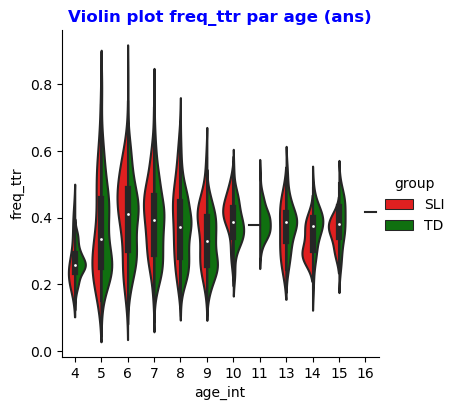

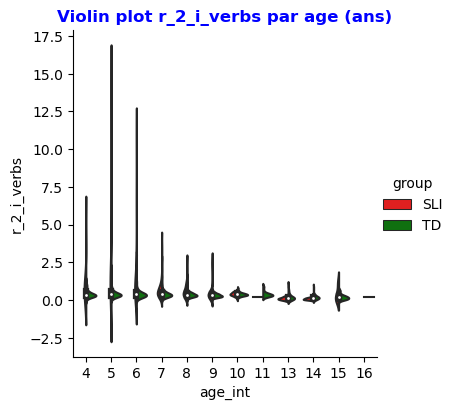

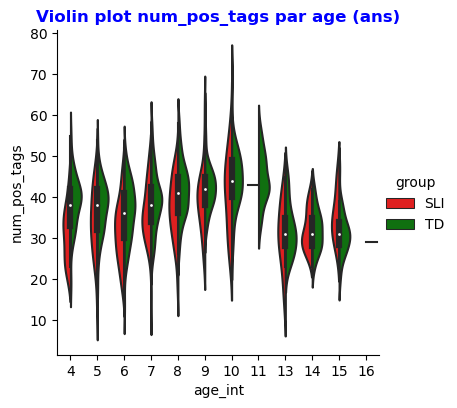

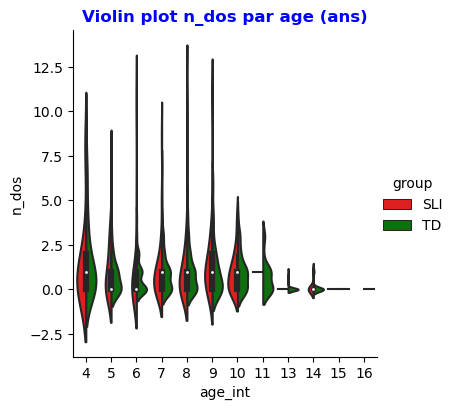

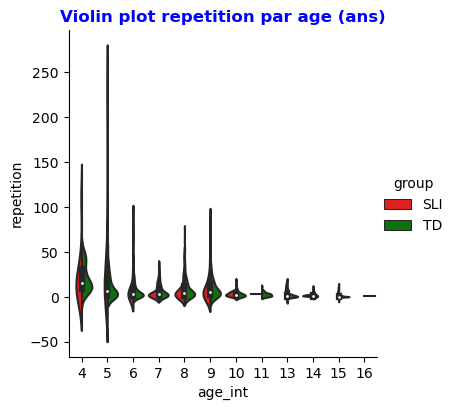

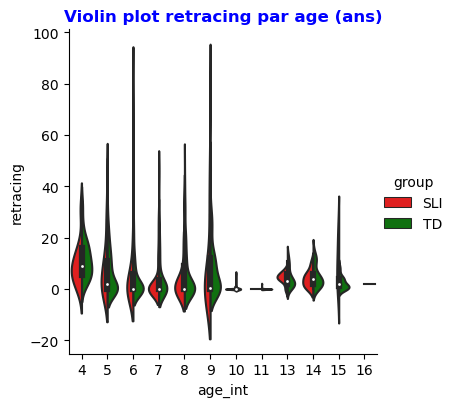

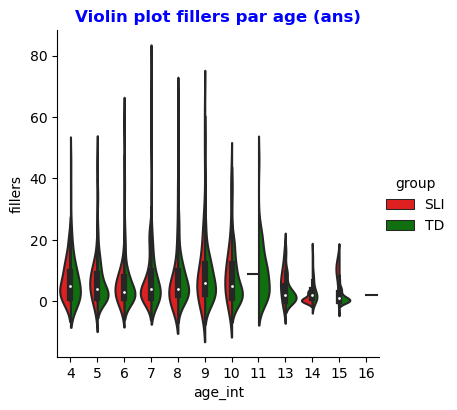

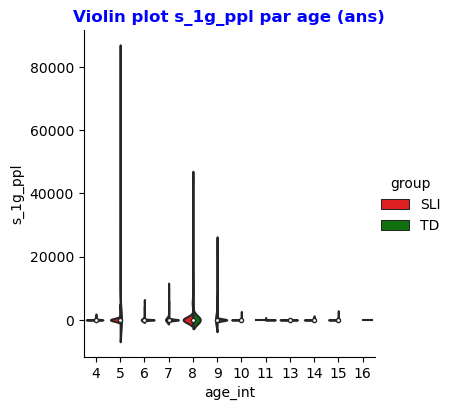

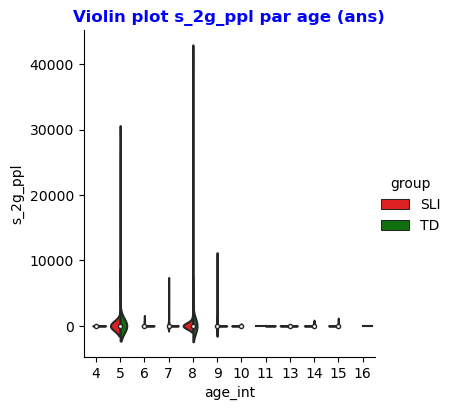

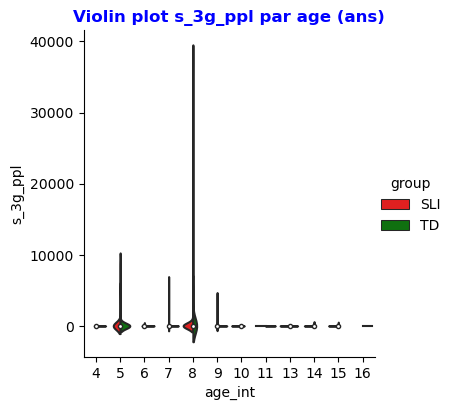

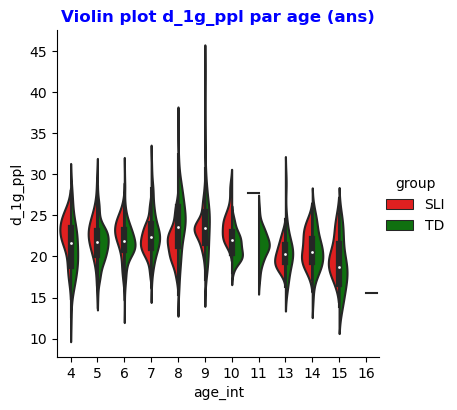

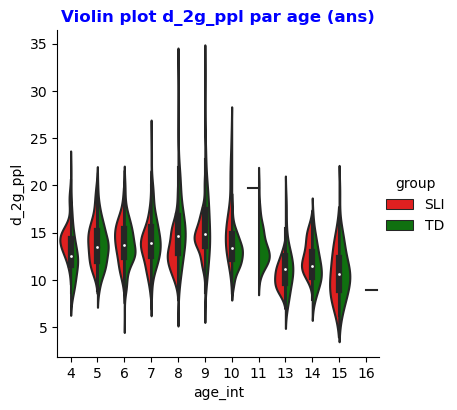

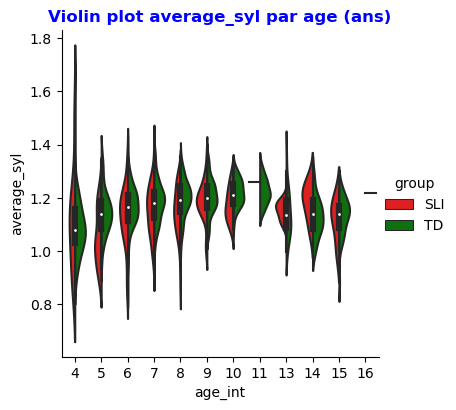

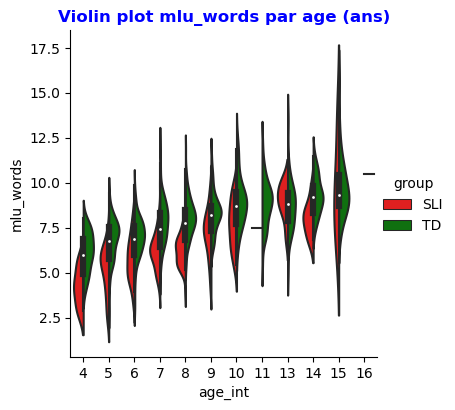

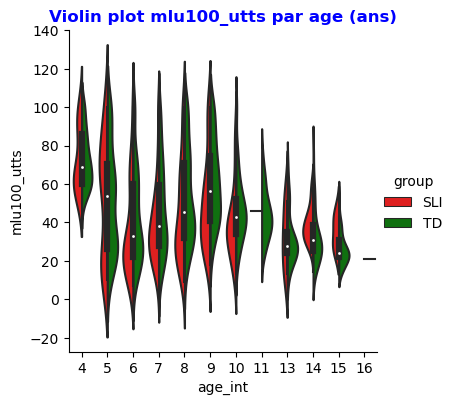

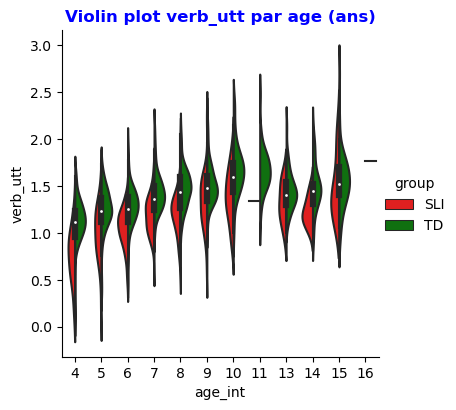

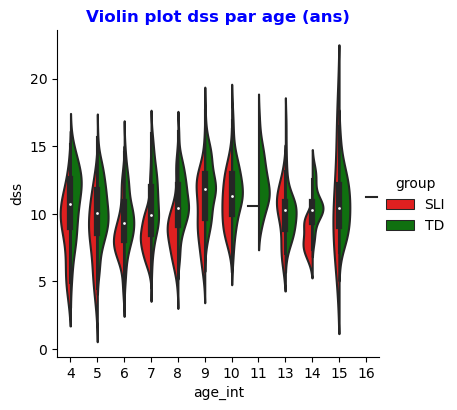

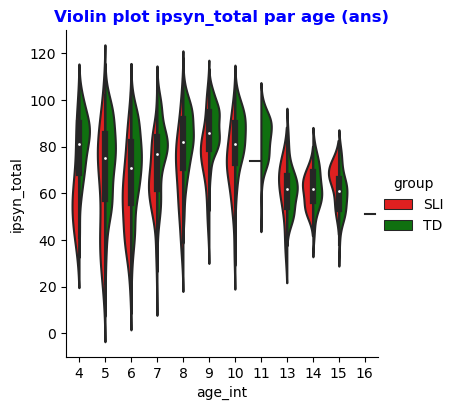

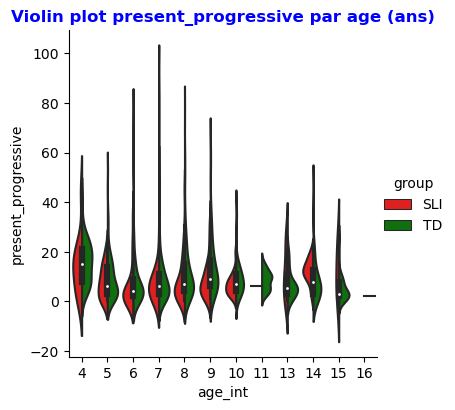

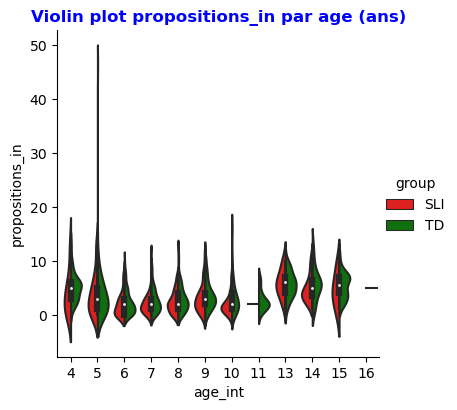

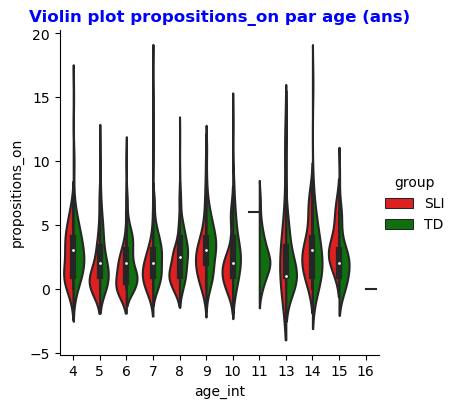

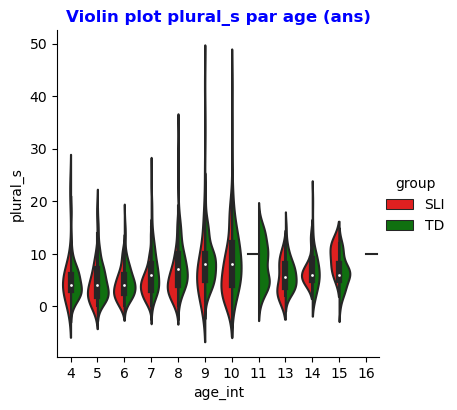

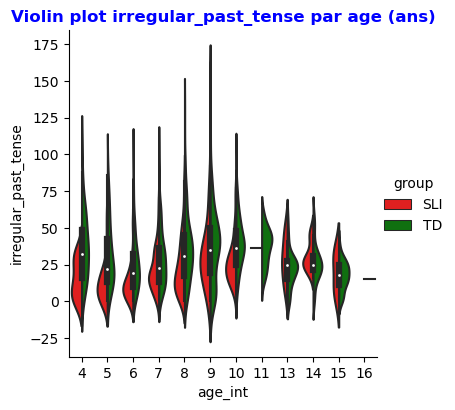

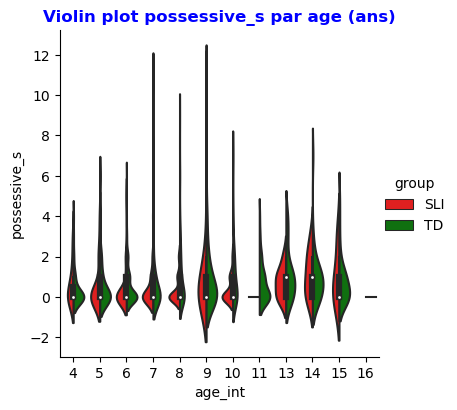

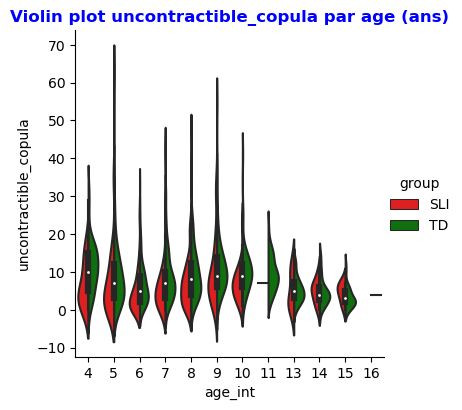

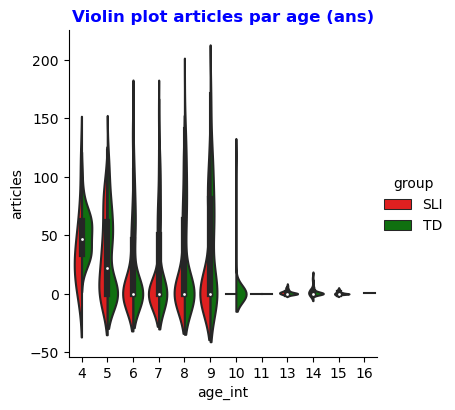

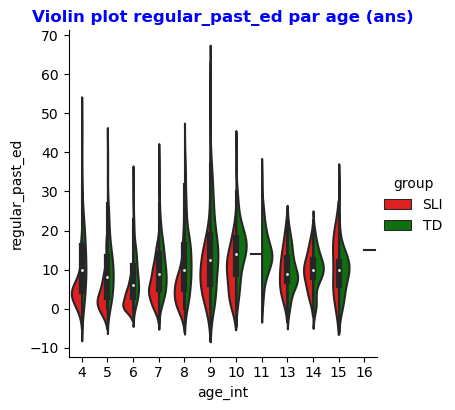

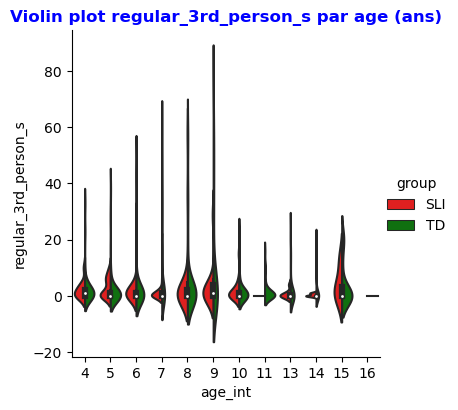

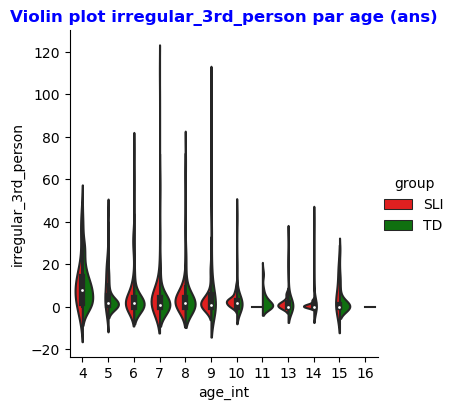

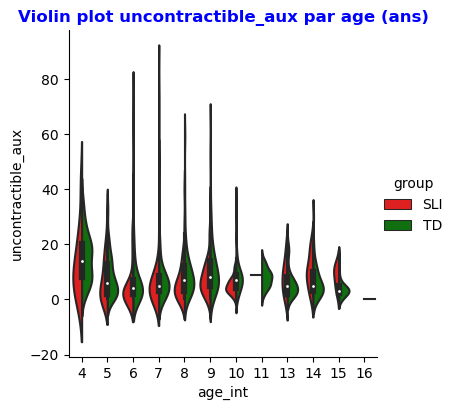

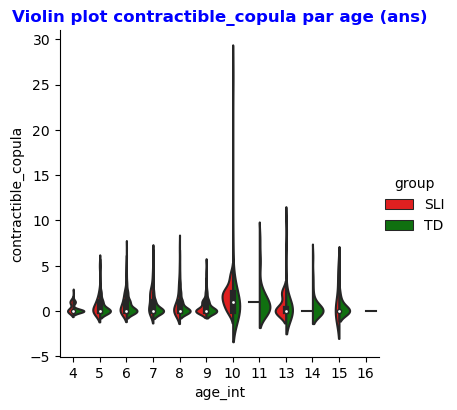

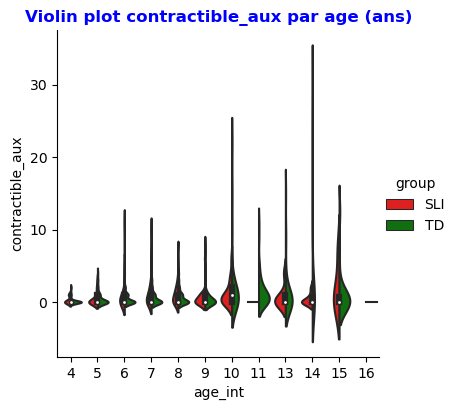

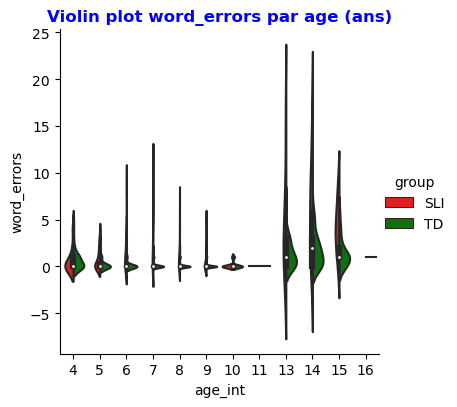

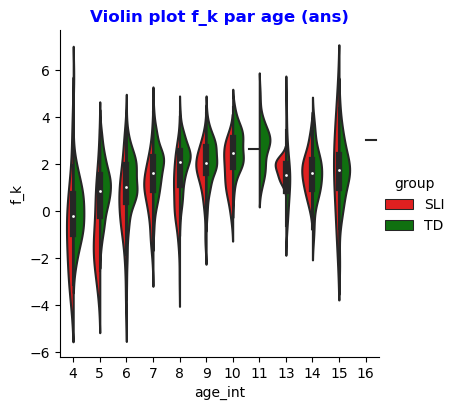

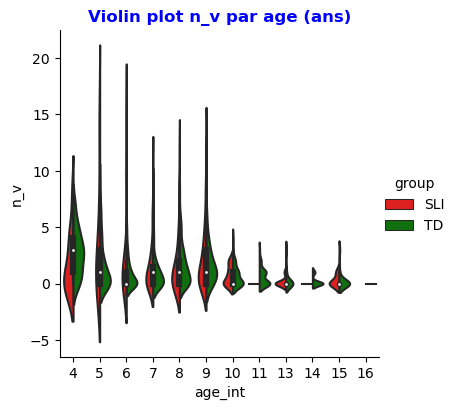

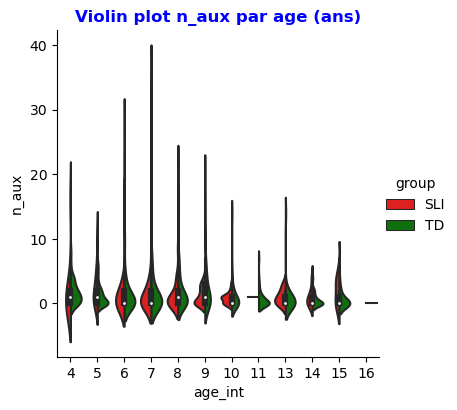

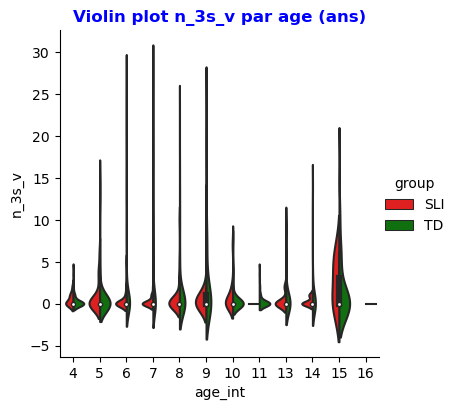

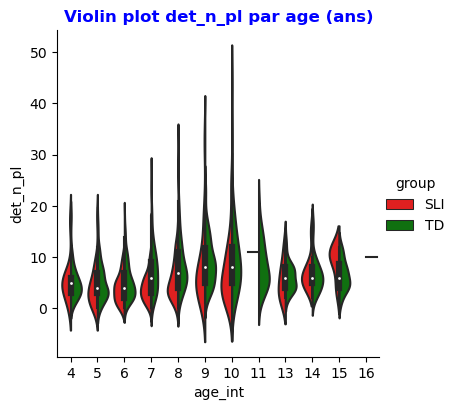

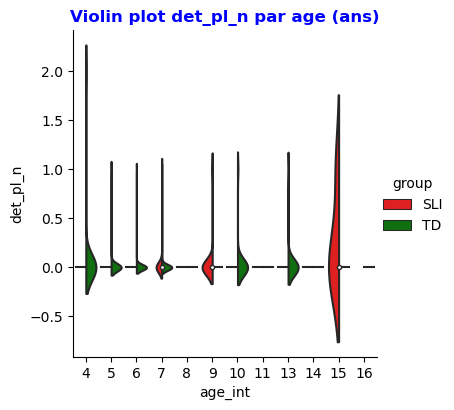

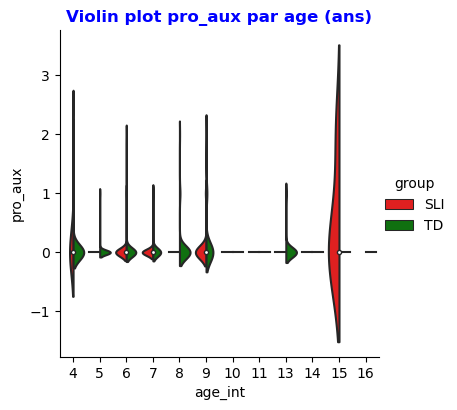

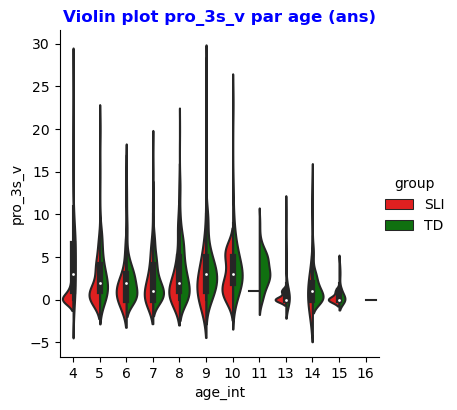

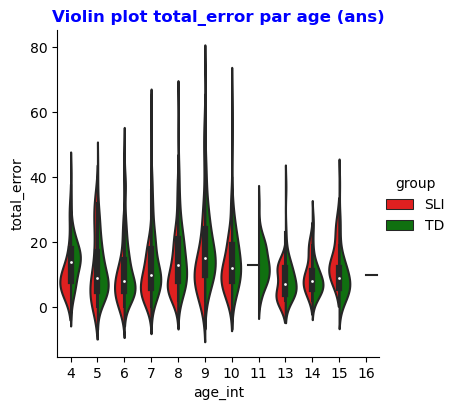

In [24]:
# Appel fonction Violin_plot_age pour tous les champs numériques i.e. sauf pour filename, sex, corpus, group
for col in data.columns:
    if ((is_numeric_dtype(data[col])) & (col != 'age') & (col != 'age_int')):
        
        Violin_plot_age(col)

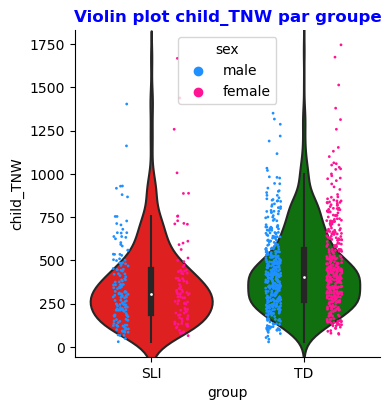

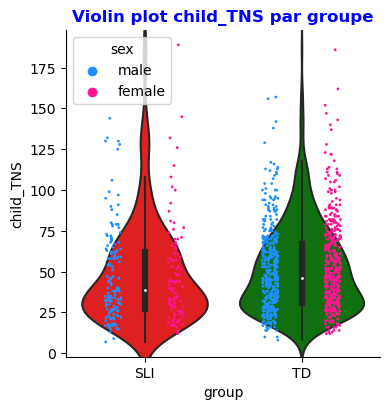

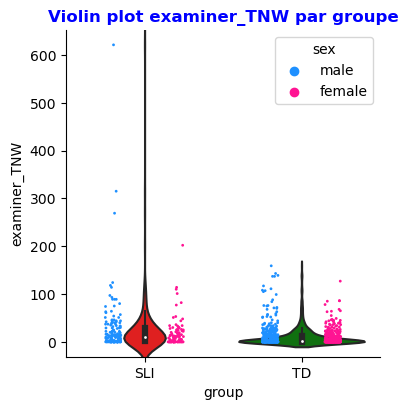

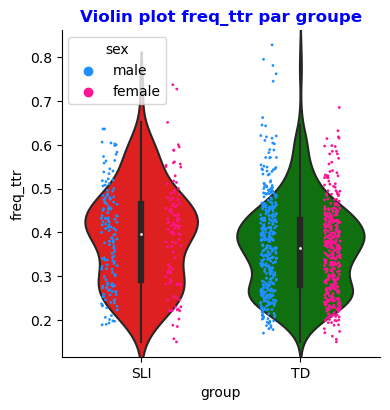

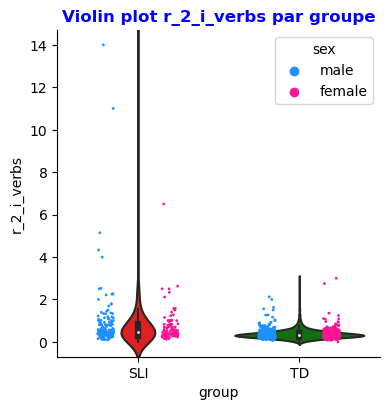

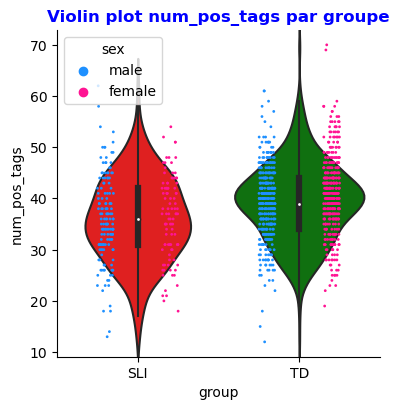

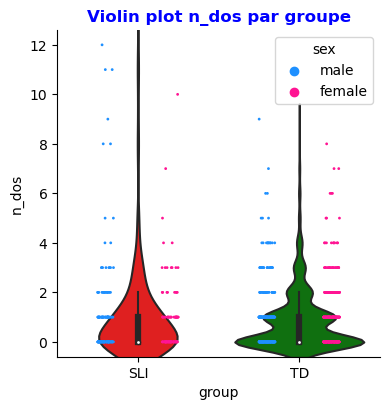

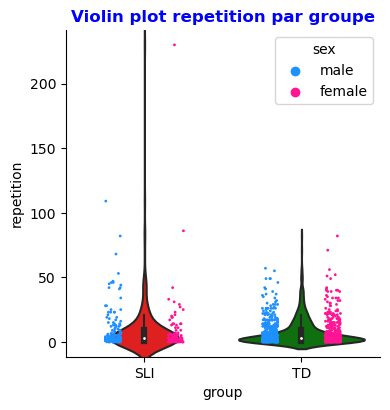

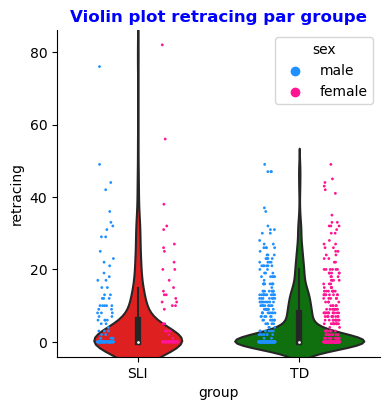

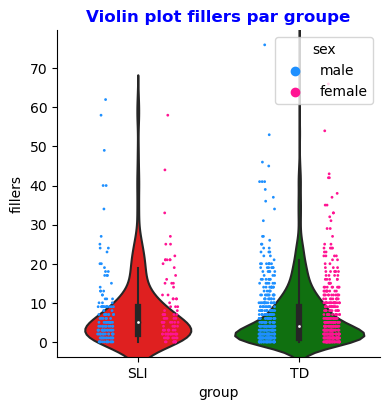

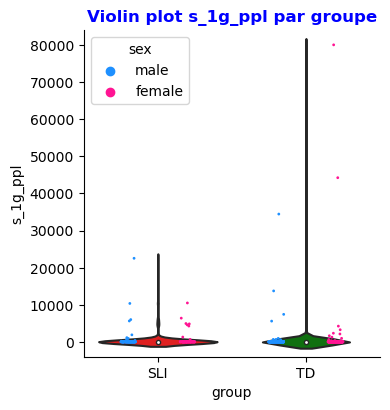

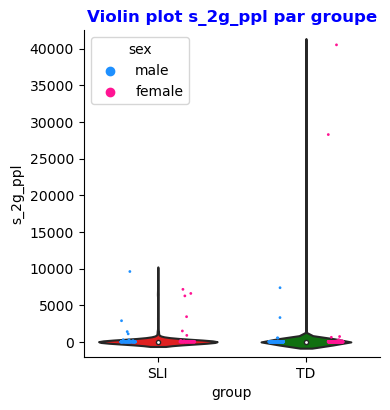

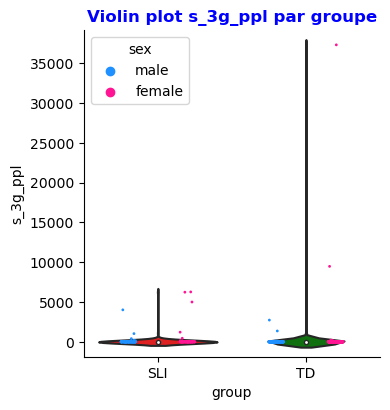

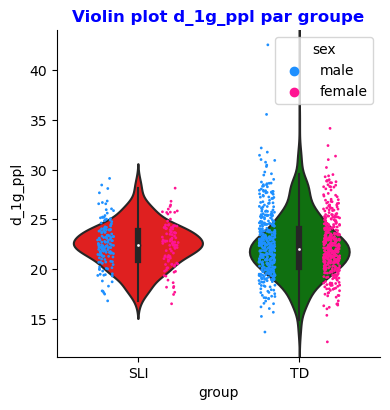

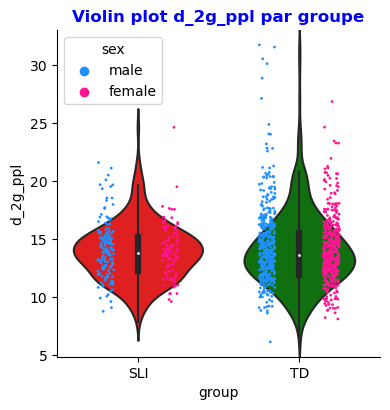

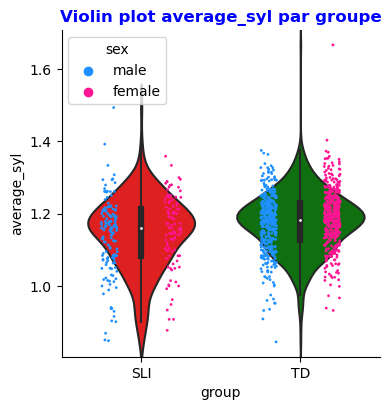

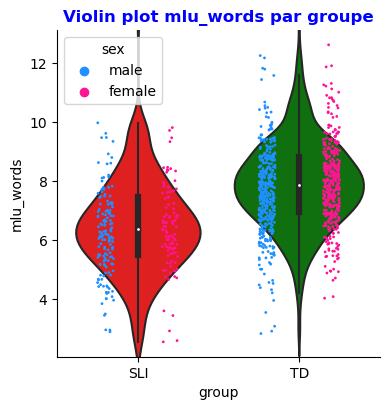

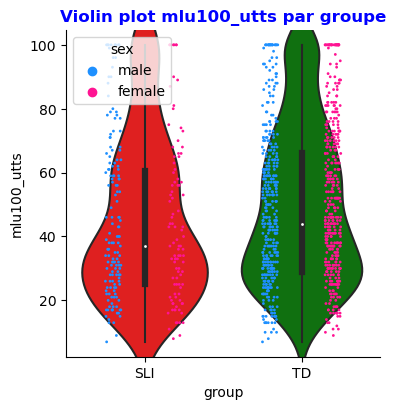

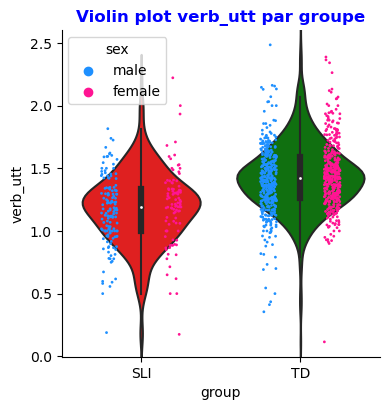

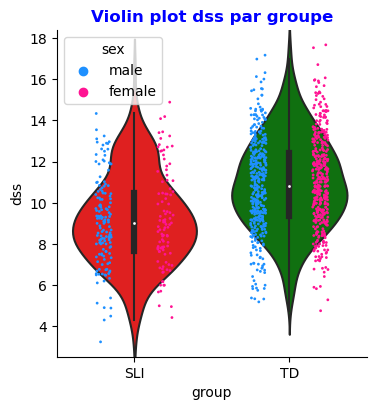

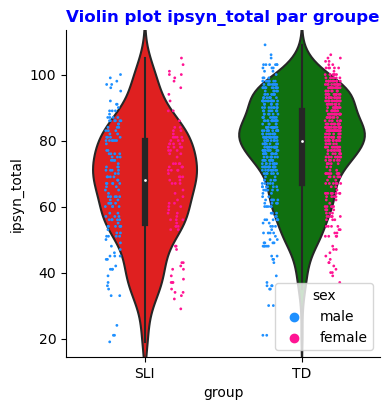

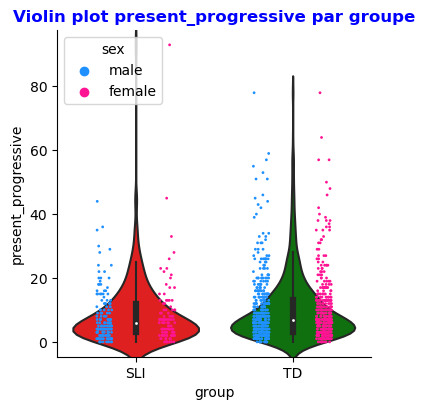

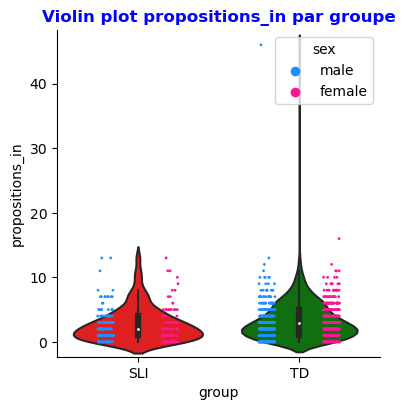

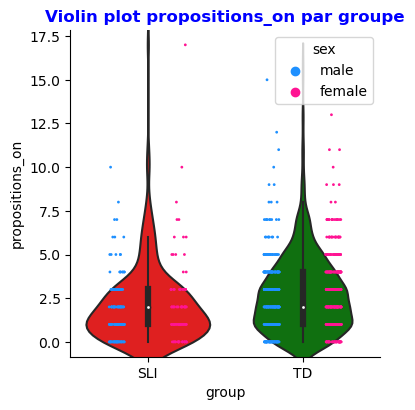

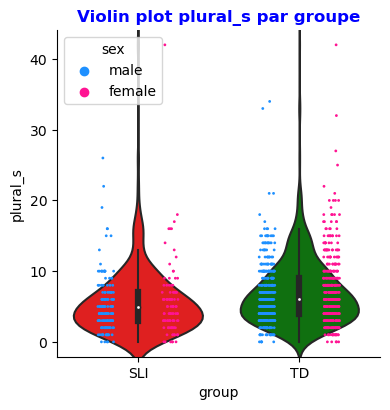

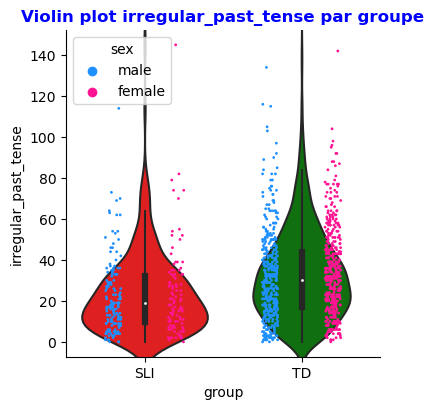

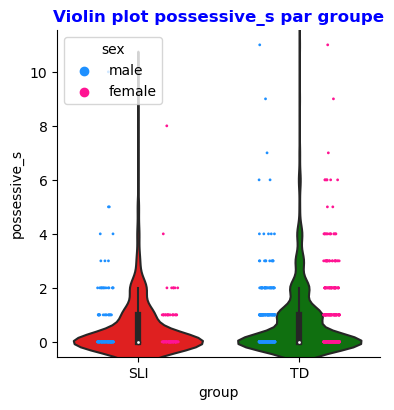

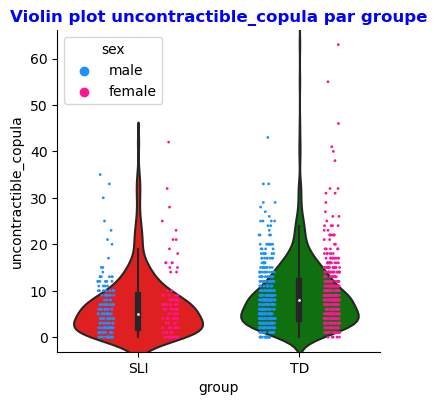

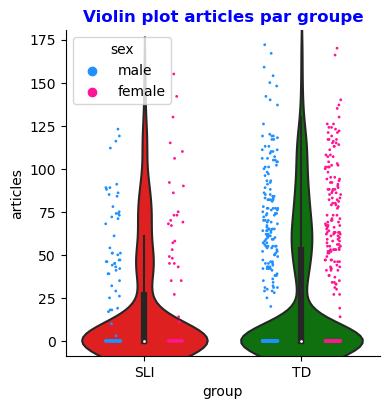

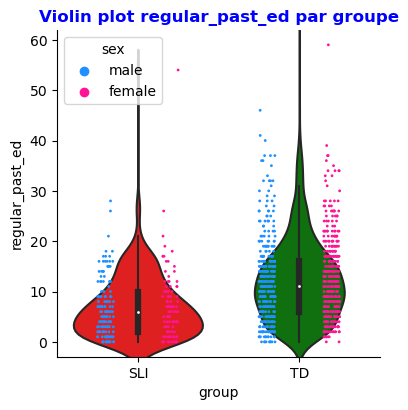

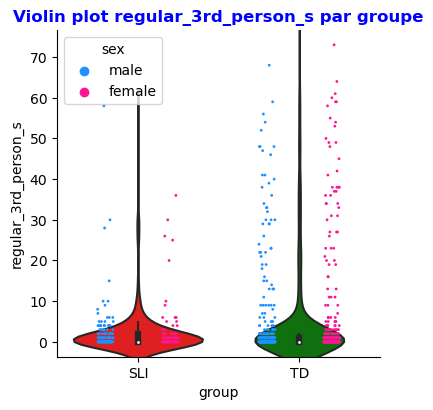

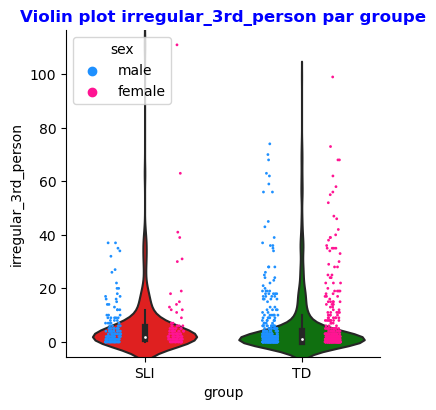

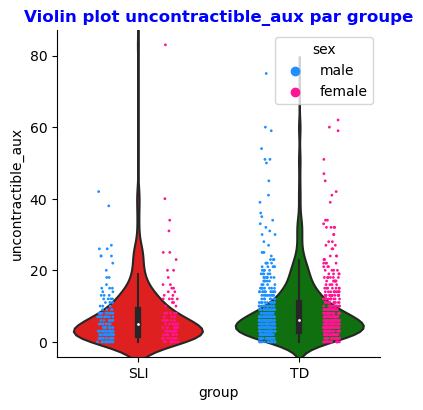

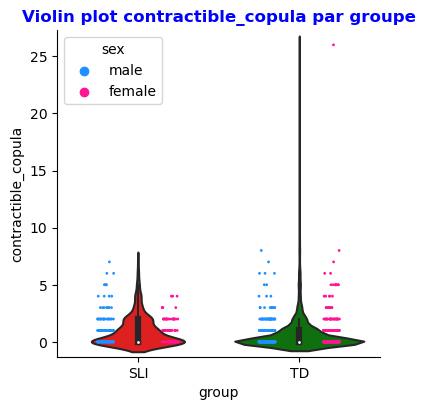

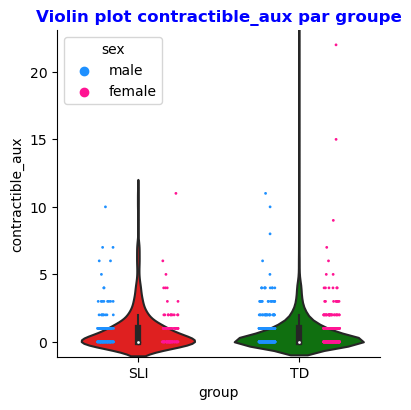

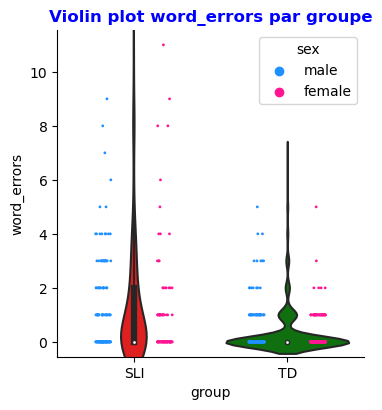

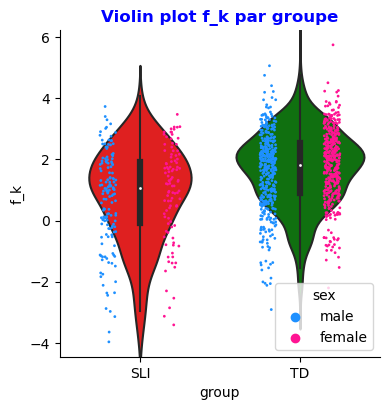

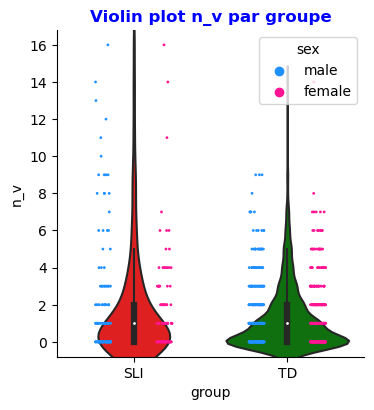

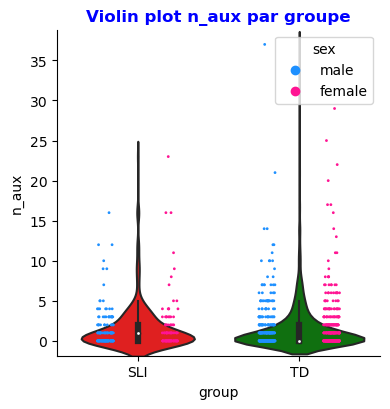

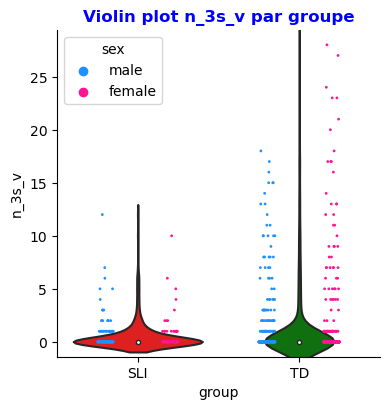

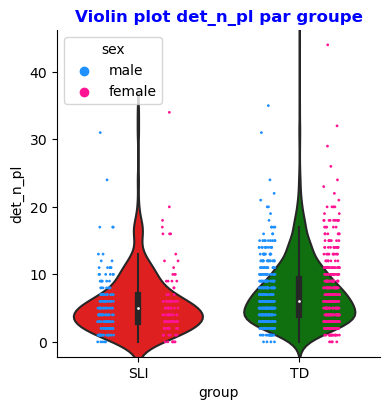

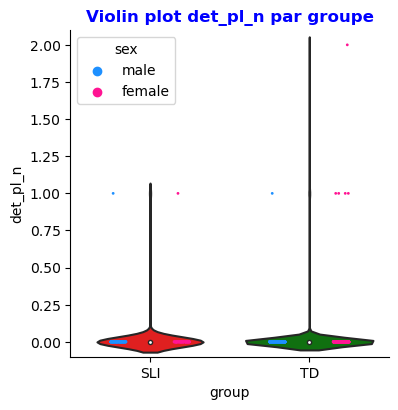

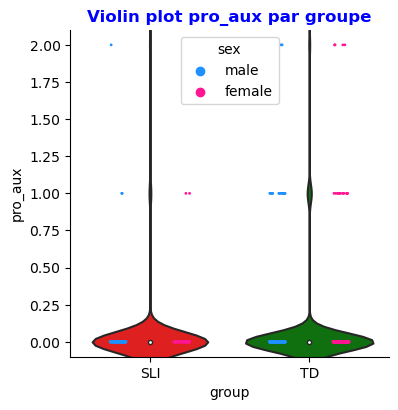

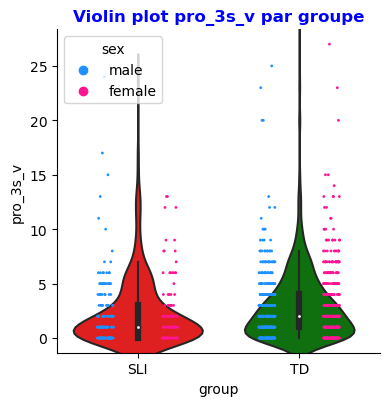

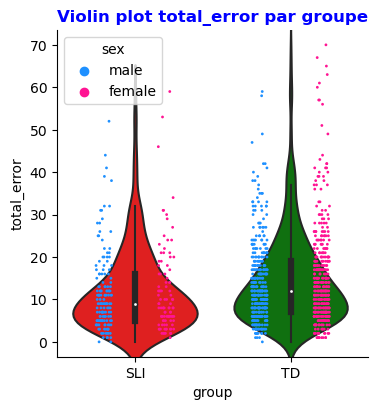

In [25]:
# Appel fonction Violin_plot_group pour tous les champs numériques i.e. sauf pour filename, sex, corpus, group
for col in data.columns:
    if ((is_numeric_dtype(data[col])) & (col != 'age') & (col != 'age_int')):
        
        Violin_plot_group(col)

# 2.4. VISUALISATION : OBJECTIF CORRELATION

# 2.4.1. SCATTER PLOT

In [26]:
#-----------------------------------------#
#       Scatter plot : champ, age         #
#-----------------------------------------#
x_td  = data[data['group'] == 'TD']['age']/12   # conversion âge en mois
x_sli = data[data['group'] == 'SLI']['age']/12


def Scatter_plot(field_p):
    
    plt.figure(figsize = (5.5, 3)) # width, height
    
    ## TD panel
    y_td = data[data['group'] == 'TD'][field_p]
    plt.scatter(x_td, y_td, color = 'green', marker = '*', label='TD')
    
    # SLI panel
    y_sli = data[data['group'] == 'SLI'][field_p]
    plt.scatter(x_sli, y_sli, color = 'red', marker = '+', label='SLI')
    
    plt.title('Scatter plot ' + field_p, fontsize = 12, color = 'blue', fontweight = 'bold')
    plt.xlabel('age (ans)' + '\n') # espace entre les figures
    plt.ylabel(field_p)
    plt.legend(loc = 'best')  # legend text comes from the plot's label parameter.
    plt.show()

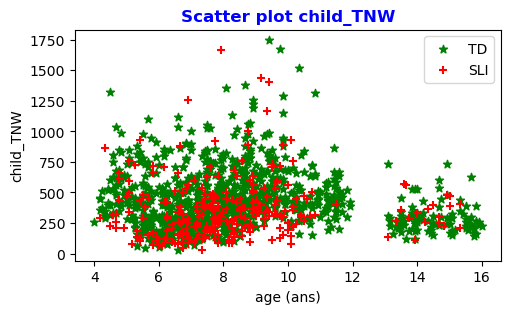

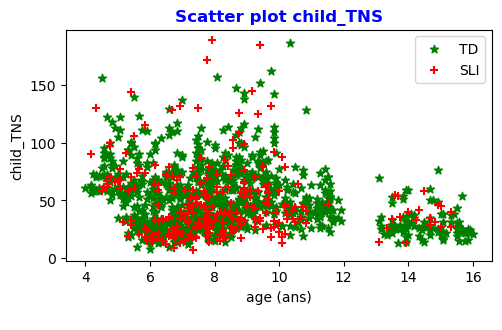

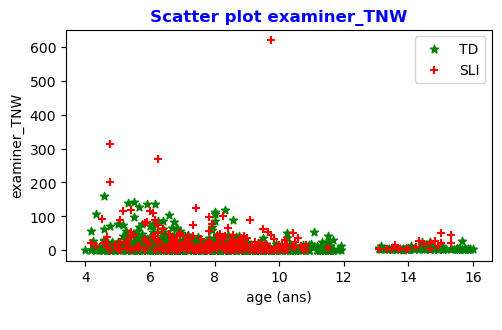

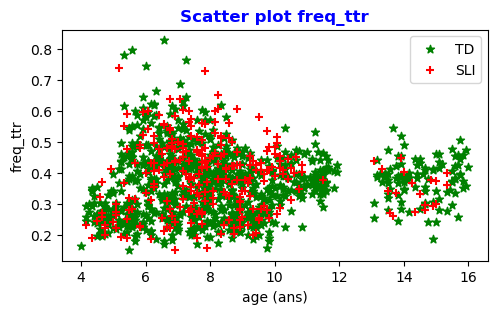

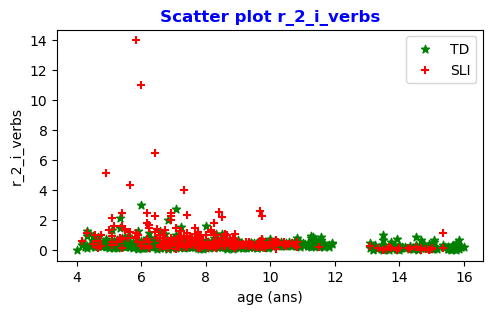

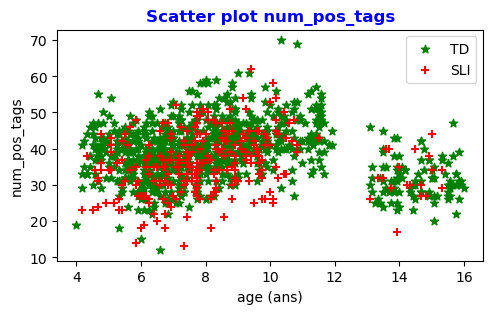

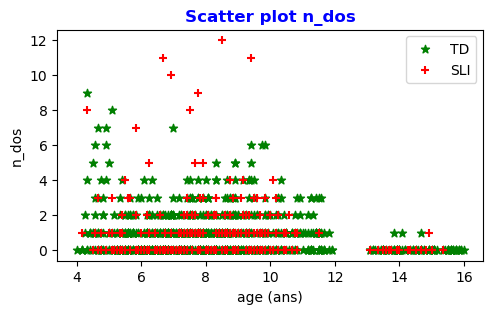

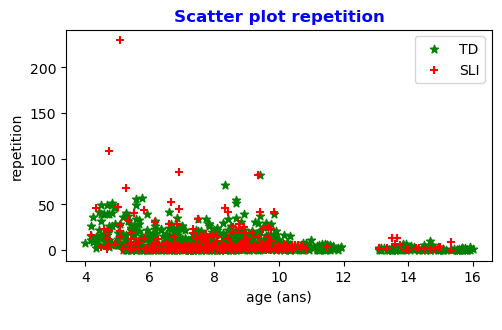

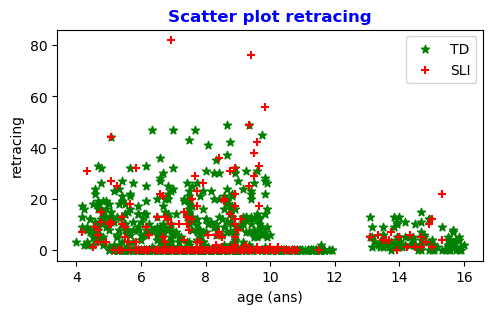

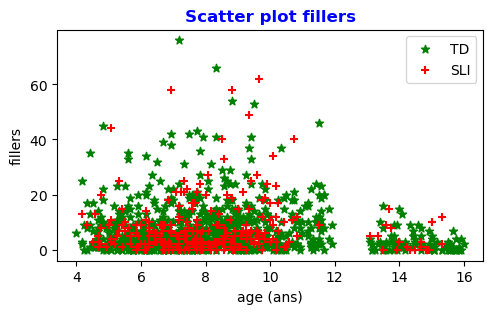

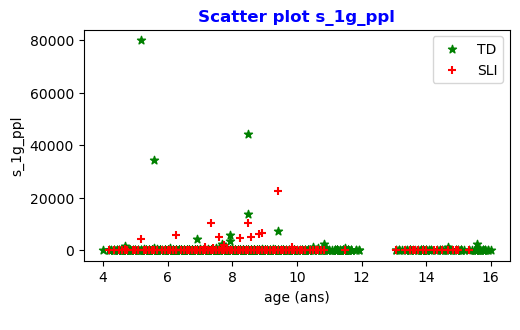

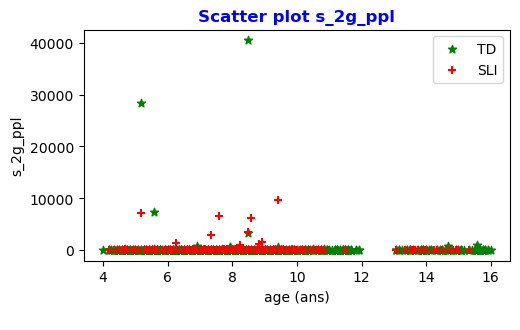

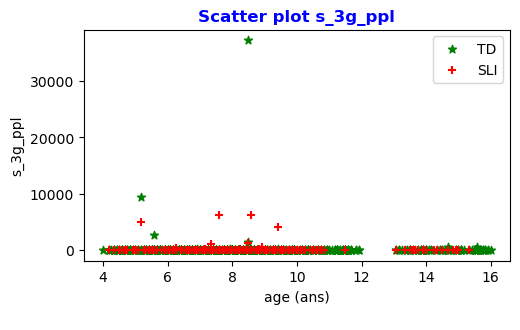

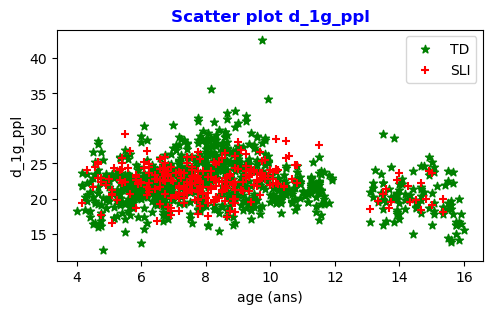

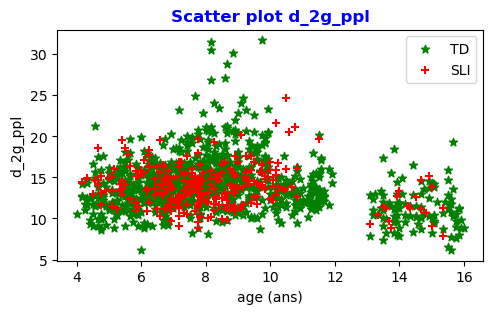

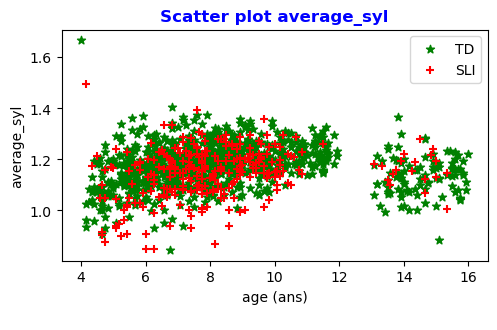

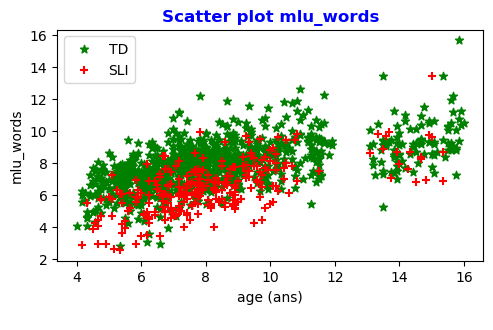

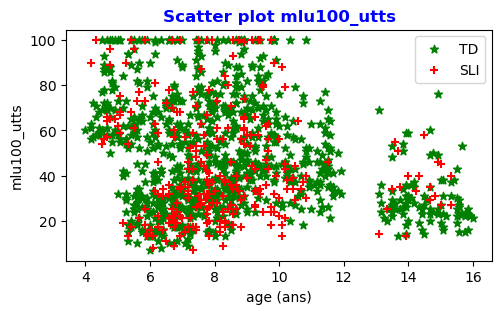

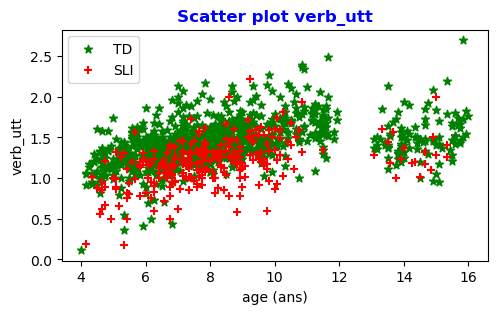

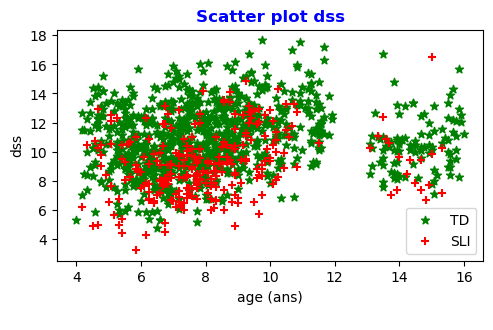

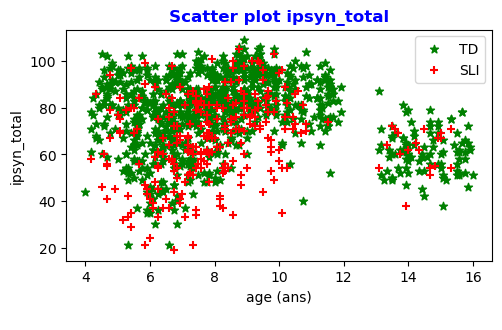

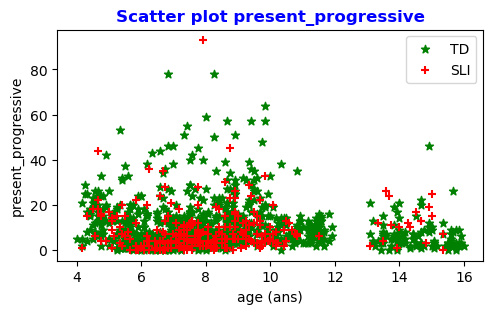

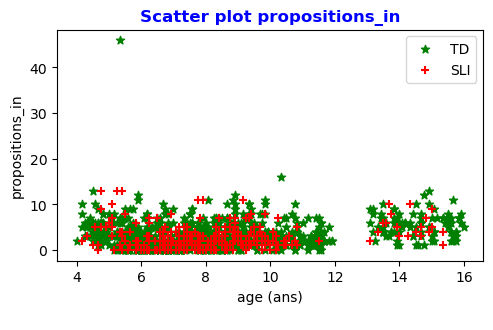

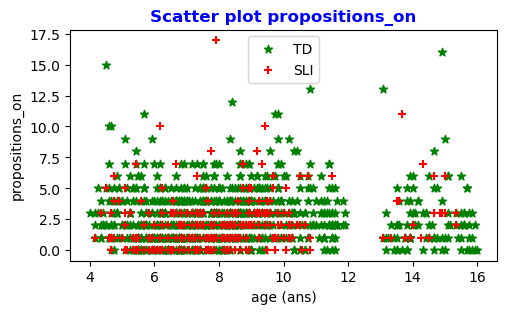

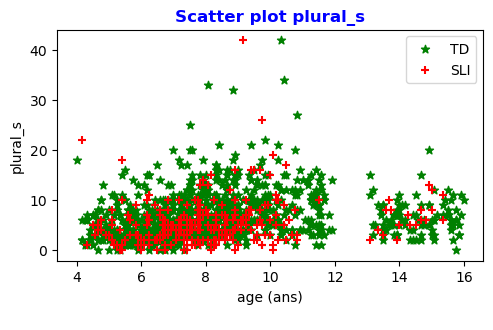

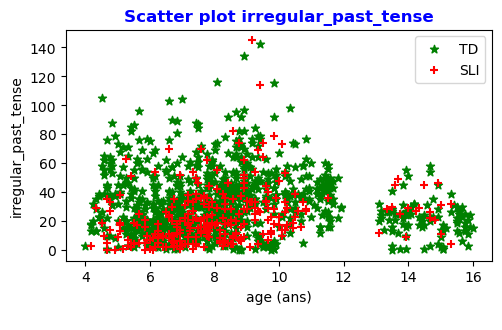

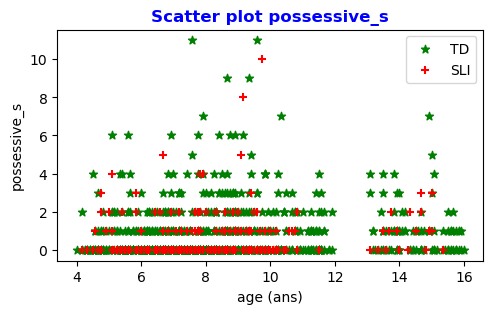

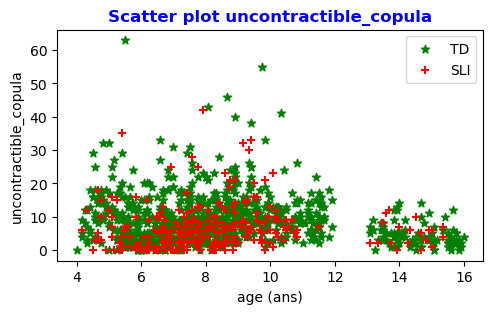

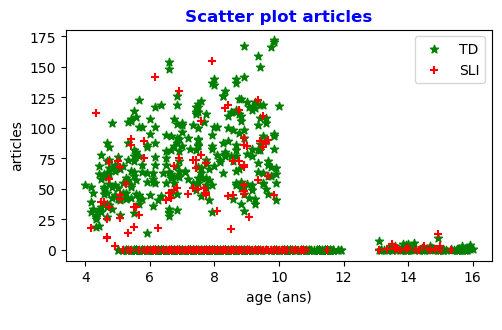

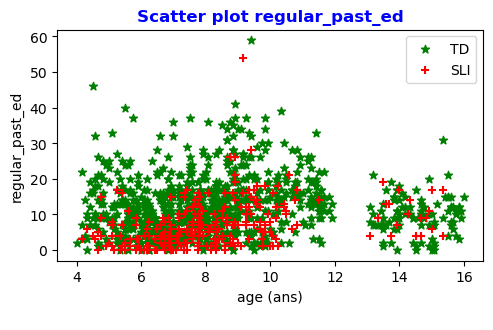

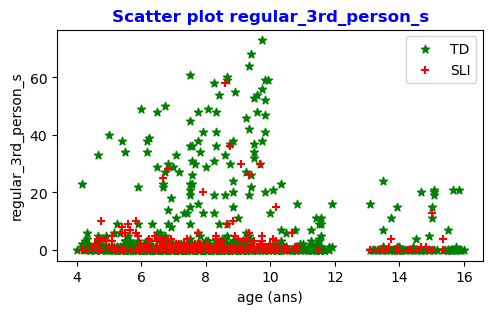

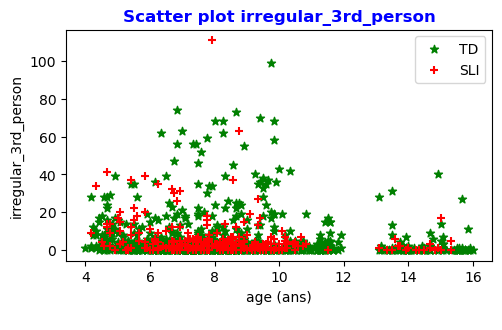

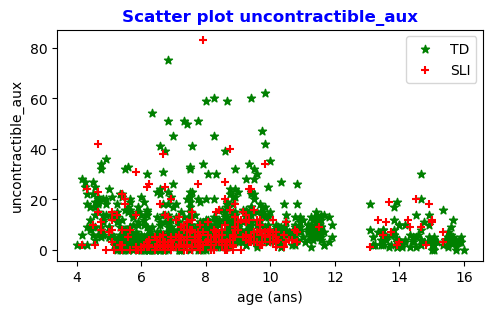

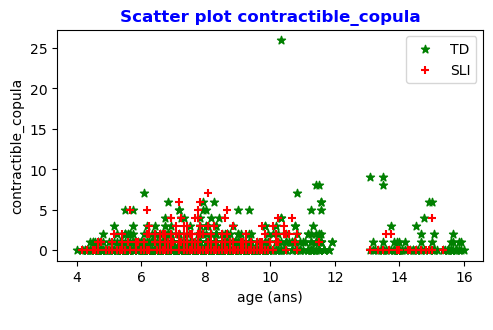

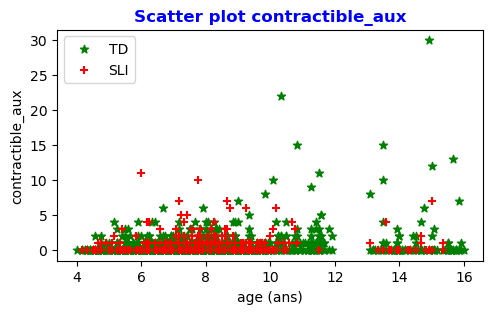

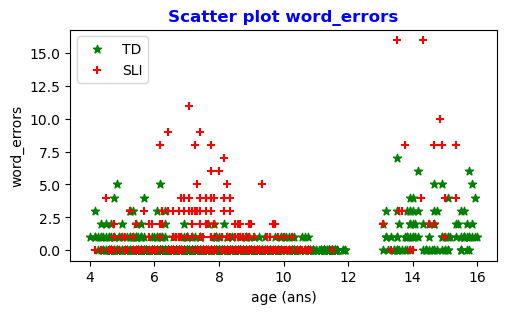

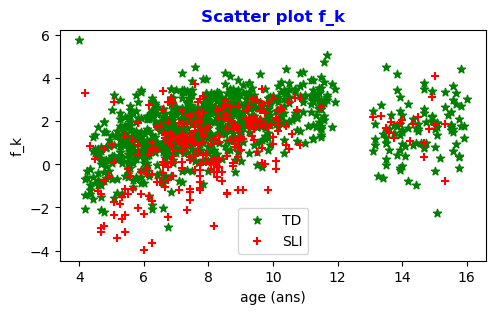

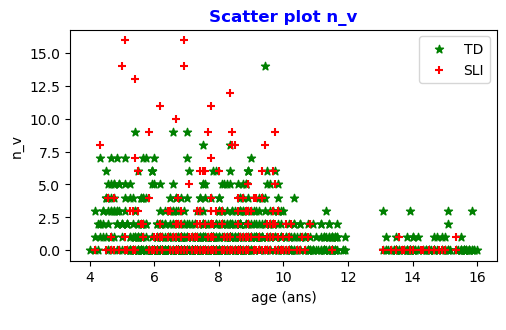

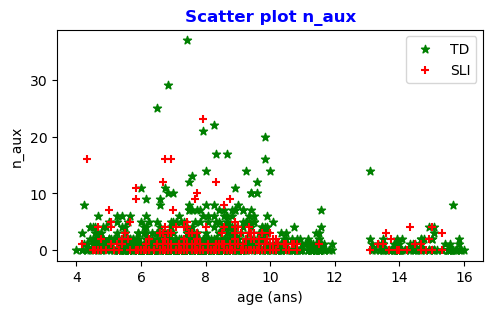

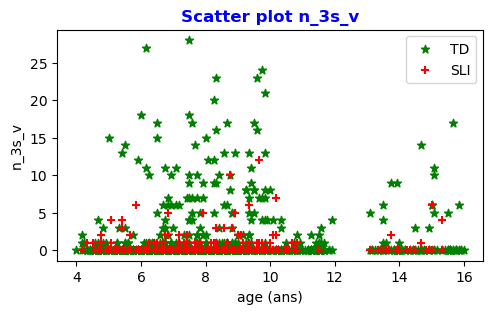

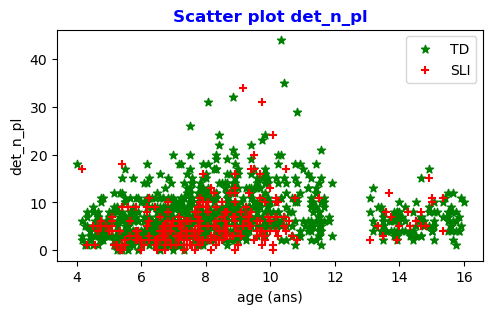

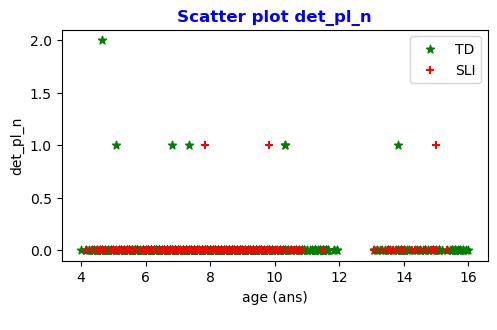

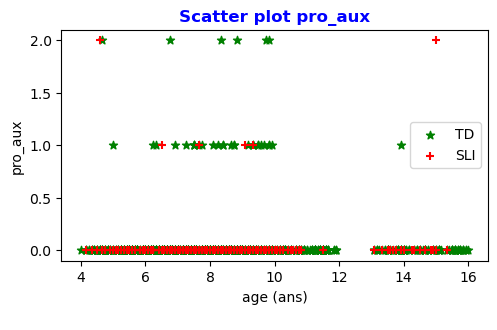

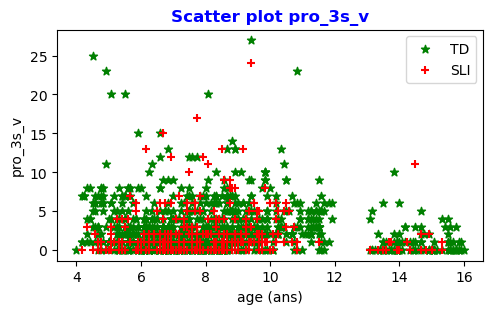

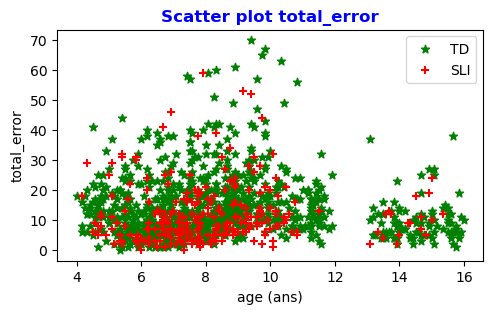

In [27]:
# Appel fonction scatter plot pour tous les champs numériques i.e. sauf pour filename, sex, corpus, group
for col in data.columns:
    if ((is_numeric_dtype(data[col])) & (col != 'age') & (col != 'age_int')):
        
        Scatter_plot(col)

# 2.4.2. CORRELOGRAMME

In [28]:
#---------------------------------------------------------#
#          Correllogram (matrice de corrélation)          #
#---------------------------------------------------------#
def Correllogram(dropDuplicates : bool):
    
    # Compute the correlation matrix
    corr = data.corr(numeric_only = True)

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(corr, dtype = bool) 
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = (17, 17))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(260, 10, s = 90.0, as_cmap = True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
    else:
        sns.heatmap(corr, cmap = cmap, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)

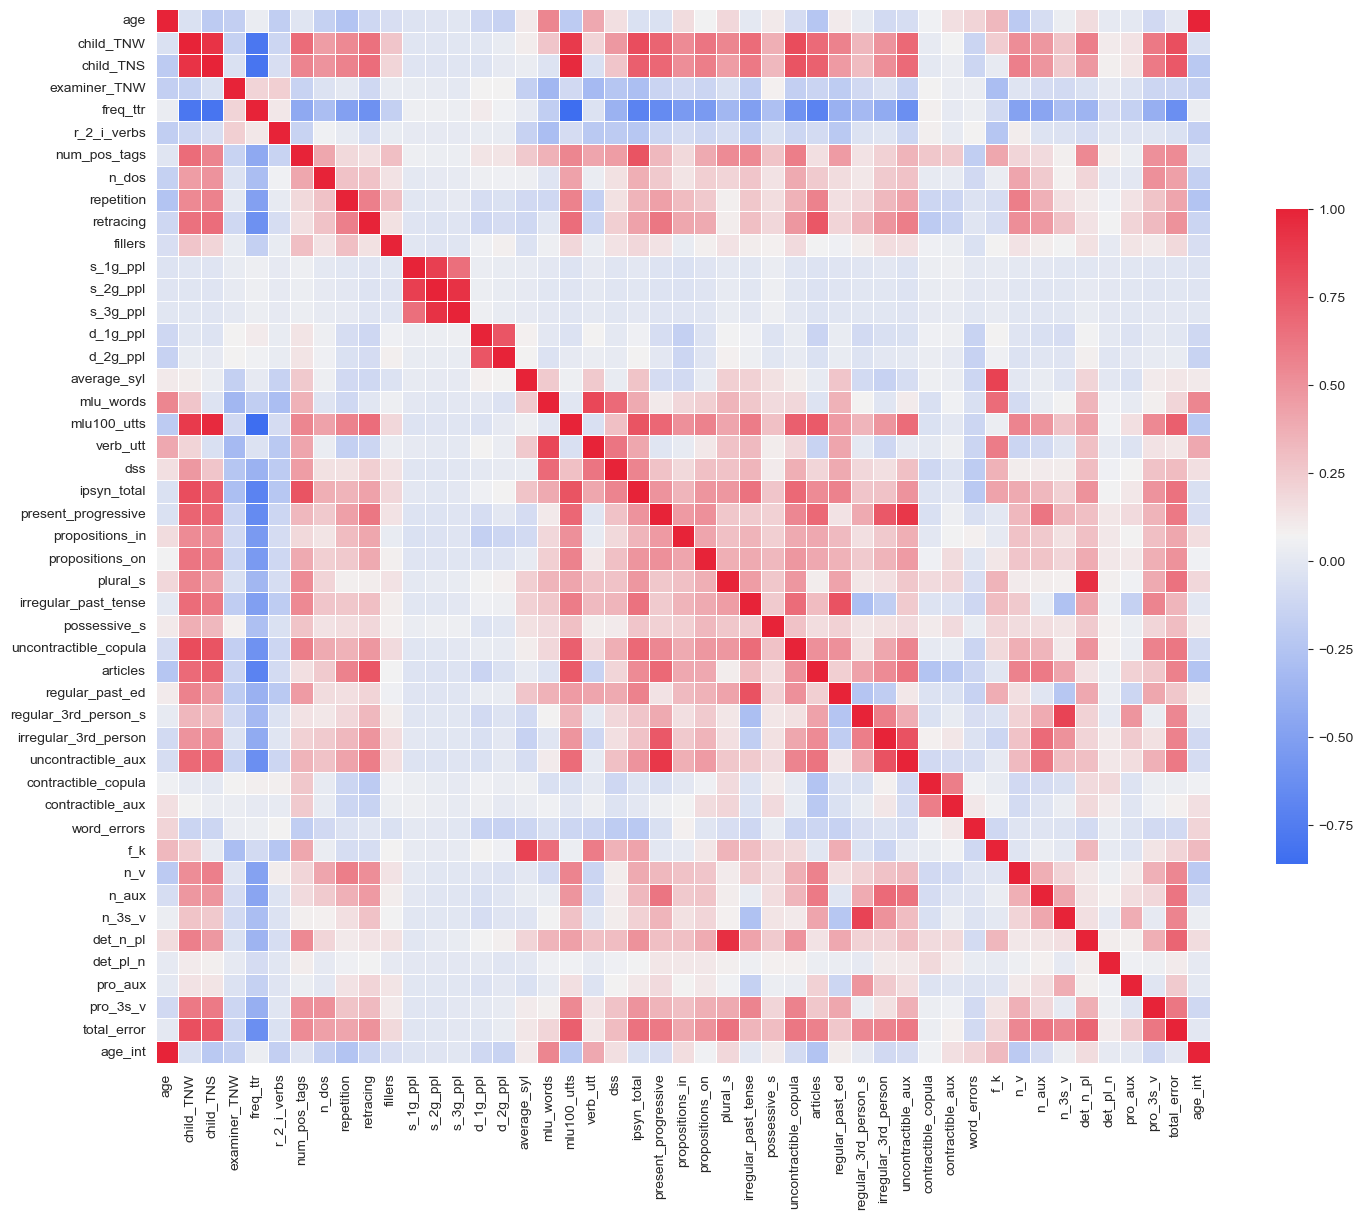

In [29]:
# Corrélogramme (matrice de corrélation) sur toutes les données
Correllogram(False)

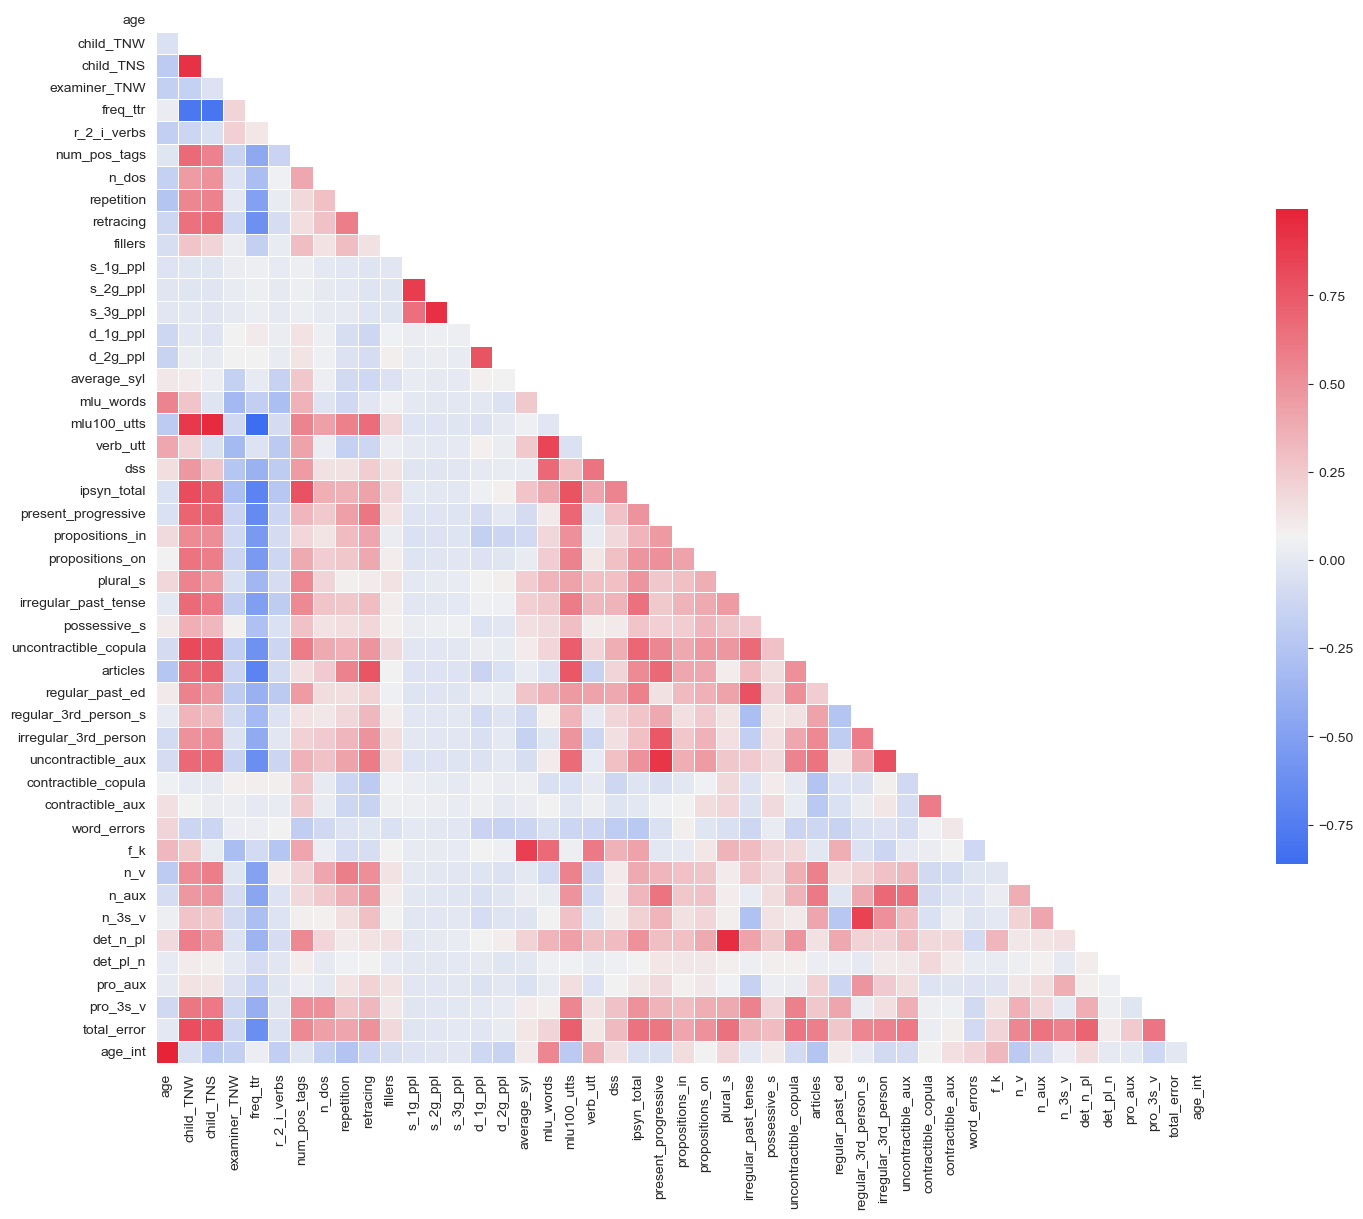

In [30]:
# Corrélogramme (matrice de corrélation) diagonal i.e. sur les données non dupliquées
Correllogram(True)

In [ ]:
# Le corrélogramme montre que les variables les plus corrélées sont :
#    > child_TNS / child_TNW
#    > mlu100_utts / child_TNS
#    > mlu100_utts / child_TNW
#    > s_2g_ppl / s_1g_ppl
#    > s_3g_ppl / s_2g_ppl
#    > verb_utt / mlu_words
#    > f_k / average_syl
#    > uncontractible_aux / present_progressive
#    > n_3s_v / irregular_3rd_person
#    > det_n_pl / plural_s

# 3. PREPROCESSING : TRANSFORMATION DONNEES BRUTES --> INTERNES

In [31]:
# Recherche des colonnes qui ont des valeurs NaN
print(data.isnull().any())

filename                 False
sex                       True
age                      False
corpus                   False
group                    False
child_TNW                False
child_TNS                False
examiner_TNW             False
freq_ttr                 False
r_2_i_verbs              False
num_pos_tags             False
n_dos                    False
repetition               False
retracing                False
fillers                  False
s_1g_ppl                 False
s_2g_ppl                 False
s_3g_ppl                 False
d_1g_ppl                 False
d_2g_ppl                 False
average_syl              False
mlu_words                False
mlu100_utts              False
verb_utt                 False
dss                      False
ipsyn_total              False
present_progressive      False
propositions_in          False
propositions_on          False
plural_s                 False
irregular_past_tense     False
possessive_s             False
uncontra

In [32]:
###########################################################
# DONNEES INTERNES i.e. transformées                      #
###########################################################
# Données internes = données brutes auxquelles on enlève :
#    > La colonne 'filename' (string), car inutile.
# L'argument axis = 1 indique la colonne.
data.drop(['filename'], axis = 1, inplace = True)

# Transformation colonnes string --> numérique avant application des algorithmes
# ------- Colonne sex ------
# contient des valeurs NaN => remplacement pas -1
data['sex'] = data['sex'].fillna(value = -1)
data['sex'] = data['sex'].replace('male', 0)
data['sex'] = data['sex'].replace('female', 1)

# ------- Colonne corpus ------
data['corpus'] = data['corpus'].replace('Conti4', 0)
data['corpus'] = data['corpus'].replace('ENNI', 1)
data['corpus'] = data['corpus'].replace('Gillam', 2)

# ------- Colonne group (résultat) ------
data['group'] = data['group'].replace('TD', 0)
data['group'] = data['group'].replace('SLI', 1)


data.head()

sex  age  corpus  group  child_TNW  child_TNS  examiner_TNW  freq_ttr  \
0   -1  165       0      1        287         36             4     0.333   
1   -1  172       0      1        368         42            27     0.274   
2   -1  160       0      1        266         26             2     0.411   
3   -1  184       0      1        405         40            21     0.359   
4   -1  176       0      1        300         35            20     0.279   

   r_2_i_verbs  num_pos_tags  ...       f_k  n_v  n_aux  n_3s_v  det_n_pl  \
0     0.108108            29  ...  1.210456    0      2       2         7   
1     0.050000            30  ...  1.871708    0      4       0         5   
2     0.105263            32  ...  2.240602    0      1       0         5   
3     0.148936            34  ...  1.877762    1      0       0        11   
4     0.150000            30  ...  0.339524    0      1       1         5   

   det_pl_n  pro_aux  pro_3s_v  total_error  age_int  
0         0        0         1           12       13  
1         0        0         0            9       14  
2         0        0         0            6       13  
3         0        0         0           12       15  
4         0        0         0            7       14  

[5 rows x 50 columns]

In [33]:
# Vérification que toutes les colonnes sont numériques.
data.dtypes

sex                        int64
age                        int64
corpus                     int64
group                      int64
child_TNW                  int64
child_TNS                  int64
examiner_TNW               int64
freq_ttr                 float64
r_2_i_verbs              float64
num_pos_tags               int64
n_dos                      int64
repetition                 int64
retracing                  int64
fillers                    int64
s_1g_ppl                 float64
s_2g_ppl                 float64
s_3g_ppl                 float64
d_1g_ppl                 float64
d_2g_ppl                 float64
average_syl              float64
mlu_words                float64
mlu100_utts                int64
verb_utt                 float64
dss                      float64
ipsyn_total                int64
present_progressive        int64
propositions_in            int64
propositions_on            int64
plural_s                   int64
irregular_past_tense       int64
possessive

In [34]:
#########################################################
# ENREGISTREMENT DONNEES NETTOYEES DANS UN FICHIER      #
#########################################################
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html
# Ecriture des données nettoyées dans un nouveau fichier csv
data.to_csv('all_data_R_high_cor_removed_clean.csv', sep = '\t', header = True, index = False)